In [3]:
#Librerías
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
#from tqdm import tqdm
#from .autonotebook import tqdm as notebook_tqdm
import seaborn as sns
import sys
import torch
sys.path.append('./3 Semestre/Machine Learning/')

In [5]:
#Lectura de la base de datos
dataset = pd.read_csv('dow_jones_index.csv')
dataset

quarter stock        date    open    high     low   close     volume  \
0          1    AA  01/07/2011  $15.82  $16.72  $15.78  $16.42  239655616   
1          1    AA   1/14/2011  $16.71  $16.71  $15.64  $15.97  242963398   
2          1    AA   1/21/2011  $16.19  $16.38  $15.60  $15.79  138428495   
3          1    AA   1/28/2011  $15.87  $16.63  $15.82  $16.13  151379173   
4          1    AA  02/04/2011  $16.18  $17.39  $16.18  $17.14  154387761   
..       ...   ...         ...     ...     ...     ...     ...        ...   
745        2   XOM   5/27/2011  $80.22  $82.63  $80.07  $82.63   68230855   
746        2   XOM  06/03/2011  $83.28  $83.75  $80.18  $81.18   78616295   
747        2   XOM  06/10/2011  $80.93  $81.87  $79.72  $79.78   92380844   
748        2   XOM   6/17/2011  $80.00  $80.82  $78.33  $79.02  100521400   
749        2   XOM   6/24/2011  $78.65  $81.12  $76.78  $76.78  118679791   

     percent_change_price  percent_change_volume_over_last_wk  \
0                 3.79267                                 NaN   
1                -4.42849                            1.380223   
2                -2.47066                          -43.024959   
3                 1.63831                            9.355500   
4                 5.93325                            1.987452   
..                    ...                                 ...   
745               3.00424                          -21.355713   
746              -2.52161                           15.221032   
747              -1.42098                           17.508519   
748              -1.22500                            8.811952   
749              -2.37762                           18.064204   

     previous_weeks_volume next_weeks_open next_weeks_close  \
0                      NaN          $16.71           $15.97   
1              239655616.0          $16.19           $15.79   
2              242963398.0          $15.87           $16.13   
3              138428495.0          $16.18           $17.14   
4              151379173.0          $17.33           $17.37   
..                     ...             ...              ...   
745             86758820.0          $83.28           $81.18   
746             68230855.0          $80.93           $79.78   
747             78616295.0          $80.00           $79.02   
748             92380844.0          $78.65           $76.78   
749            100521400.0          $76.88           $82.01   

     percent_change_next_weeks_price  days_to_next_dividend  \
0                          -4.428490                     26   
1                          -2.470660                     19   
2                           1.638310                     12   
3                           5.933250                      5   
4                           0.230814                     97   
..                               ...                    ...   
745                        -2.521610                     75   
746                        -1.420980                     68   
747                        -1.225000                     61   
748                        -2.377620                     54   
749                         6.672740                     47   

     percent_return_next_dividend  
0                        0.182704  
1                        0.187852  
2                        0.189994  
3                        0.185989  
4                        0.175029  
..                            ...  
745                      0.568801  
746                      0.578960  
747                      0.589120  
748                      0.594786  
749                      0.612139  

[750 rows x 16 columns]

In [ ]:
#Etapa de Preparación

In [6]:
dataset.describe(include ='all')

quarter stock        date    open    high     low   close  \
count   750.000000   750         750     750     750     750     750   
unique         NaN    30          25     722     713     711     711   
top            NaN    AA  01/07/2011  $37.26  $74.85  $16.97  $36.00   
freq           NaN    25          30       3       2       3       3   
mean      1.520000   NaN         NaN     NaN     NaN     NaN     NaN   
std       0.499933   NaN         NaN     NaN     NaN     NaN     NaN   
min       1.000000   NaN         NaN     NaN     NaN     NaN     NaN   
25%       1.000000   NaN         NaN     NaN     NaN     NaN     NaN   
50%       2.000000   NaN         NaN     NaN     NaN     NaN     NaN   
75%       2.000000   NaN         NaN     NaN     NaN     NaN     NaN   
max       2.000000   NaN         NaN     NaN     NaN     NaN     NaN   

              volume  percent_change_price  \
count   7.500000e+02            750.000000   
unique           NaN                   NaN   
top              NaN                   NaN   
freq             NaN                   NaN   
mean    1.175478e+08              0.050262   
std     1.584381e+08              2.517809   
min     9.718851e+06            -15.422900   
25%     3.086624e+07             -1.288053   
50%     5.306088e+07              0.000000   
75%     1.327218e+08              1.650888   
max     1.453439e+09              9.882230   

        percent_change_volume_over_last_wk  previous_weeks_volume  \
count                           720.000000           7.200000e+02   
unique                                 NaN                    NaN   
top                                    NaN                    NaN   
freq                                   NaN                    NaN   
mean                              5.593627           1.173876e+08   
std                              40.543478           1.592322e+08   
min                             -61.433175           9.718851e+06   
25%                             -19.804284           3.067832e+07   
50%                               0.512586           5.294556e+07   
75%                              21.800622           1.333230e+08   
max                             327.408924           1.453439e+09   

       next_weeks_open next_weeks_close  percent_change_next_weeks_price  \
count              750              750                       750.000000   
unique             720              715                              NaN   
top             $37.26           $41.52                              NaN   
freq                 3                3                              NaN   
mean               NaN              NaN                         0.238468   
std                NaN              NaN                         2.679538   
min                NaN              NaN                       -15.422900   
25%                NaN              NaN                        -1.222068   
50%                NaN              NaN                         0.101193   
75%                NaN              NaN                         1.845562   
max                NaN              NaN                         9.882230   

        days_to_next_dividend  percent_return_next_dividend  
count              750.000000                    750.000000  
unique                    NaN                           NaN  
top                       NaN                           NaN  
freq                      NaN                           NaN  
mean                52.525333                      0.691826  
std                 46.335098                      0.305482  
min                  0.000000                      0.065574  
25%                 24.000000                      0.534549  
50%                 47.000000                      0.681067  
75%                 69.000000                      0.854291  
max                336.000000                      1.564210

In [8]:
#Valores Faltantes
def valores_faltantes(dataset):
    missing_values_count = dataset.isnull().sum()
    total_missing = missing_values_count.sum() 
    #Porcentaje de datos faltantes
    total_missing_porcent = total_missing/(np.product(dataset.shape))*100
    print('Porcentaje total de valores faltantes:',total_missing_porcent,'%')
    print('')
    print('Porcentaje de valores faltantes de cada atributo:')
    for col in dataset.columns:
        VP_missing = np.mean(dataset[col].isnull())
        print('{} - {}%'.format(col,round(VP_missing*100)))  

valores_faltantes(dataset)

Porcentaje total de valores faltantes: 0.5 %

Porcentaje de valores faltantes de cada atributo:
quarter - 0%
stock - 0%
date - 0%
open - 0%
high - 0%
low - 0%
close - 0%
volume - 0%
percent_change_price - 0%
percent_change_volume_over_last_wk - 4%
previous_weeks_volume - 4%
next_weeks_open - 0%
next_weeks_close - 0%
percent_change_next_weeks_price - 0%
days_to_next_dividend - 0%
percent_return_next_dividend - 0%


<AxesSubplot:>

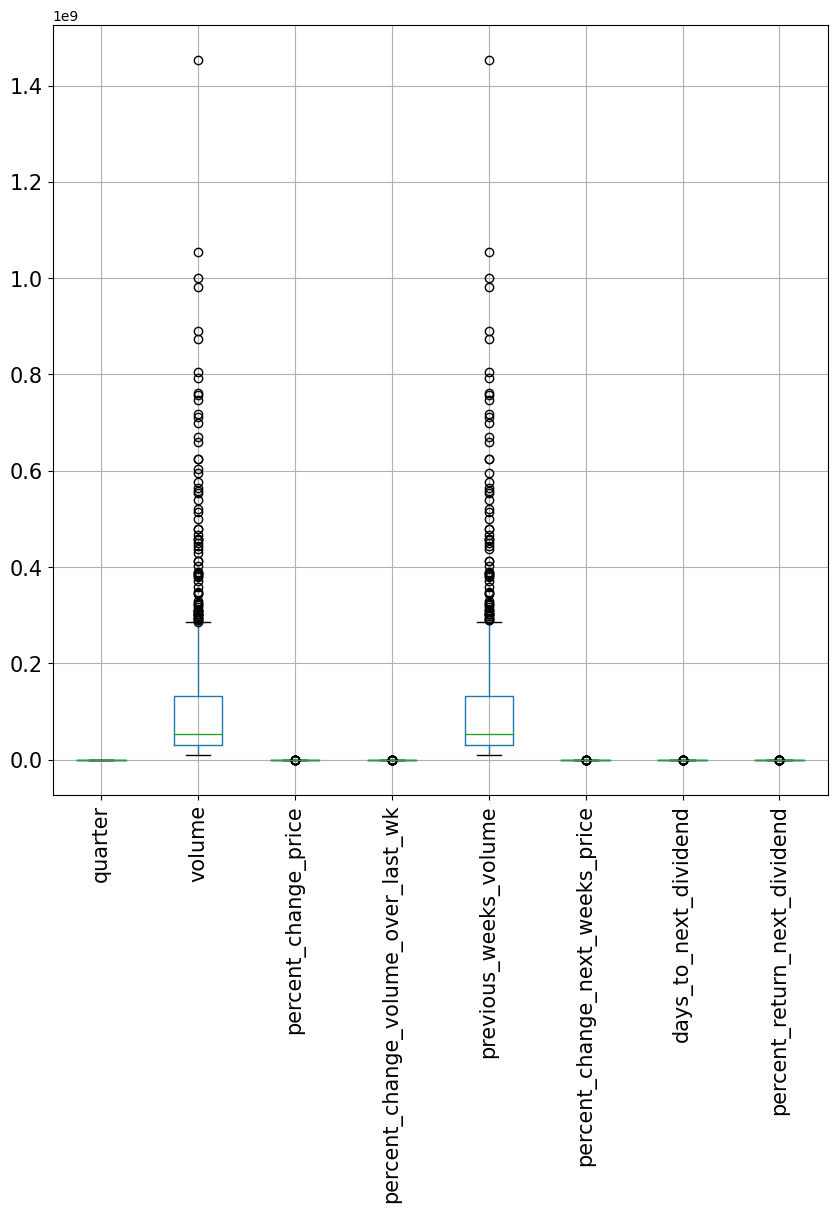

In [10]:
#Visualización de Outliers
dataset.boxplot(rot=90, fontsize=15,figsize = (10,10))

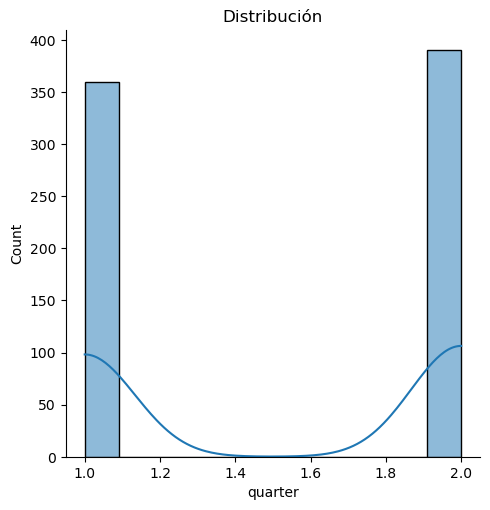

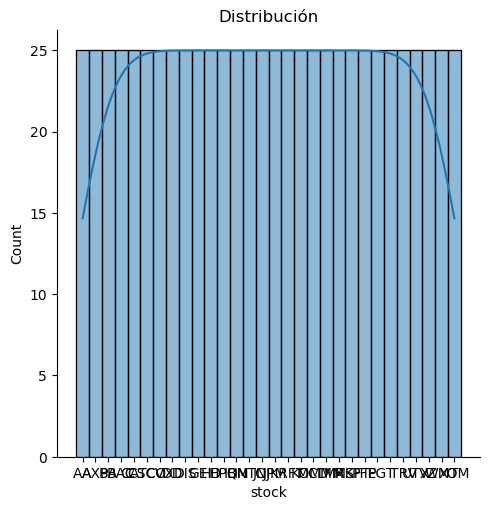

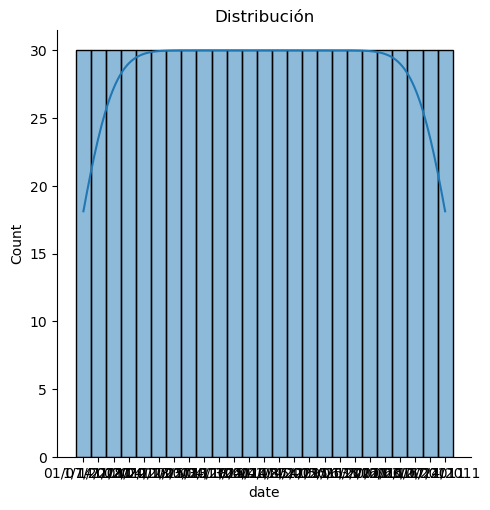

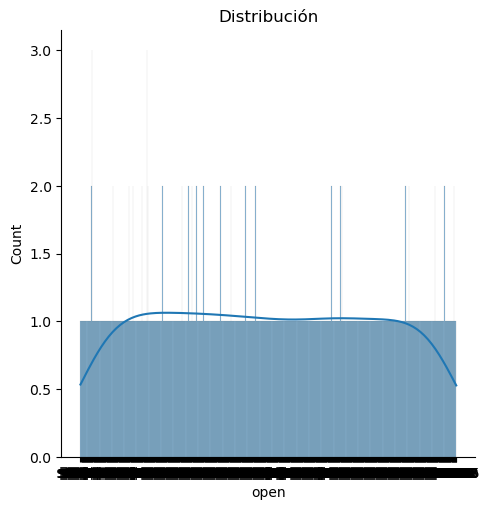

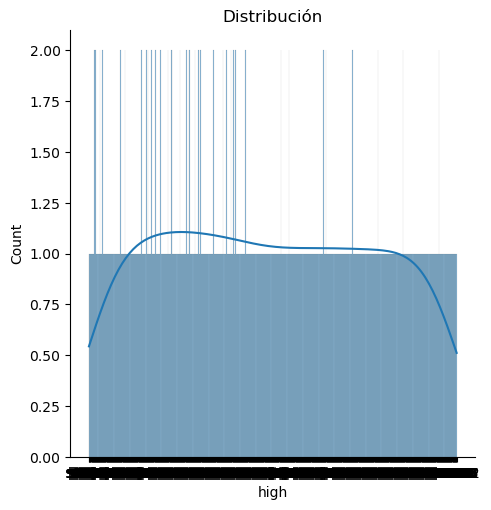

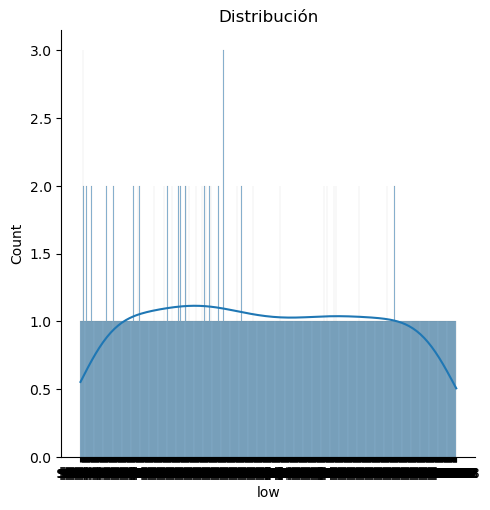

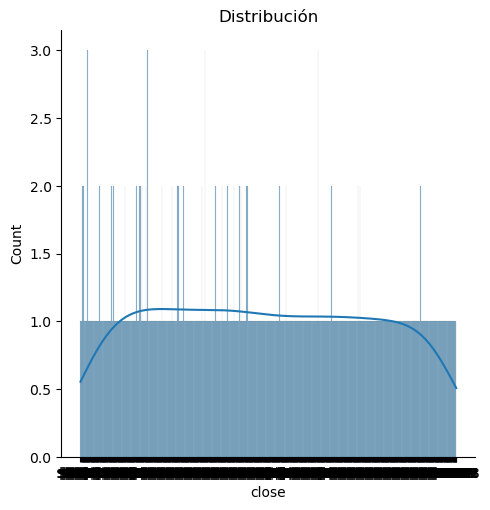

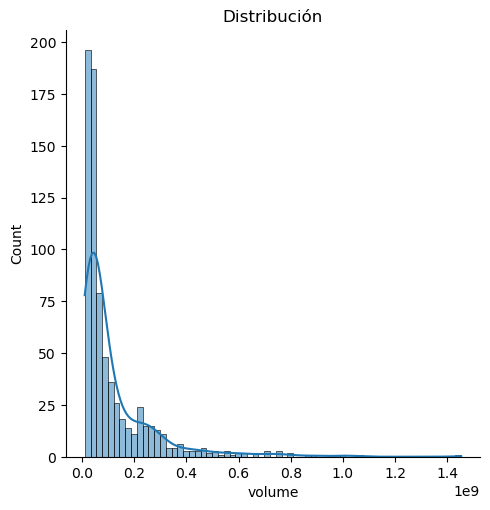

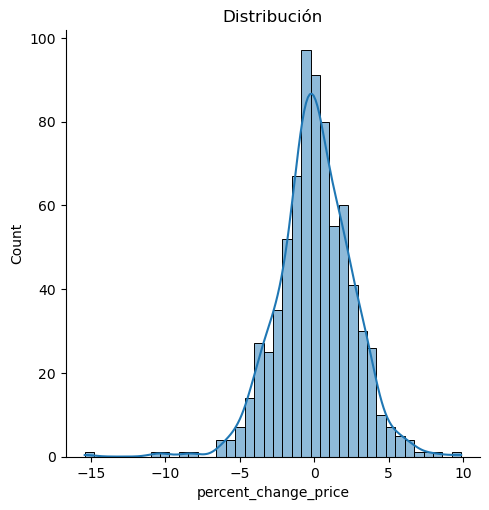

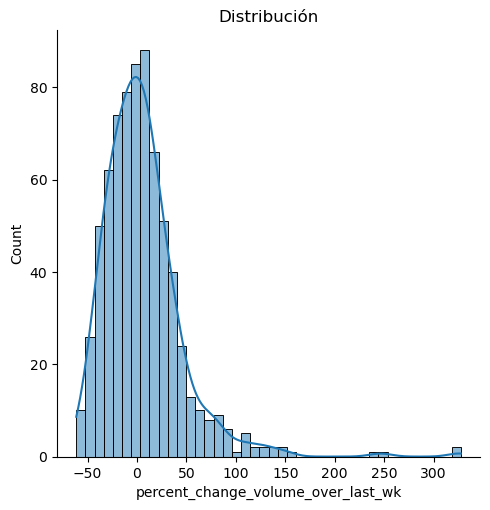

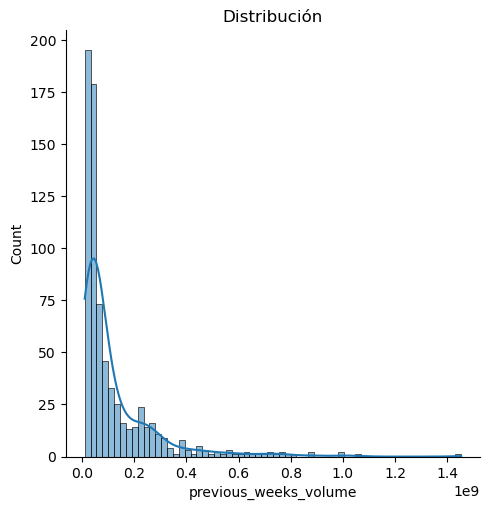

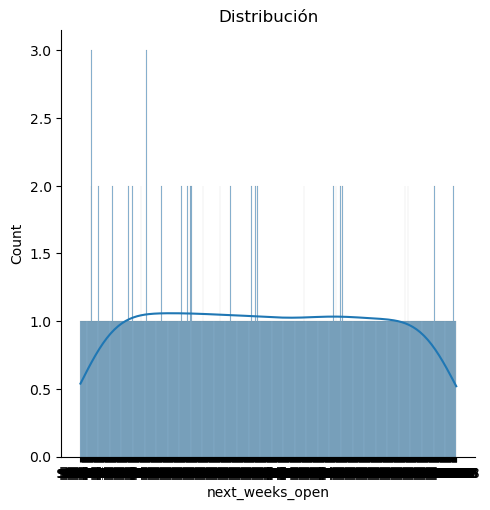

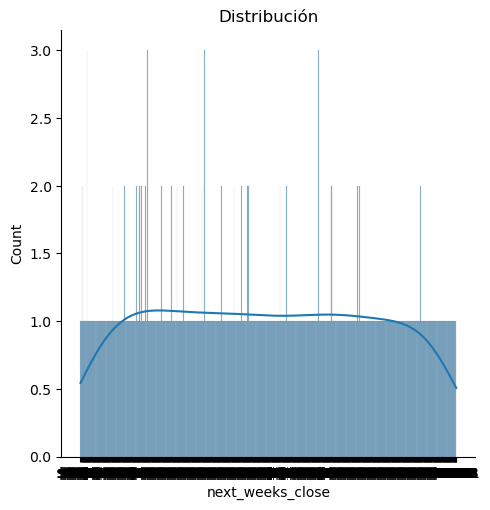

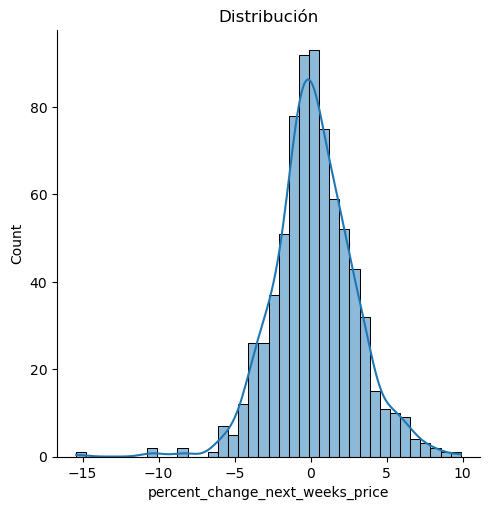

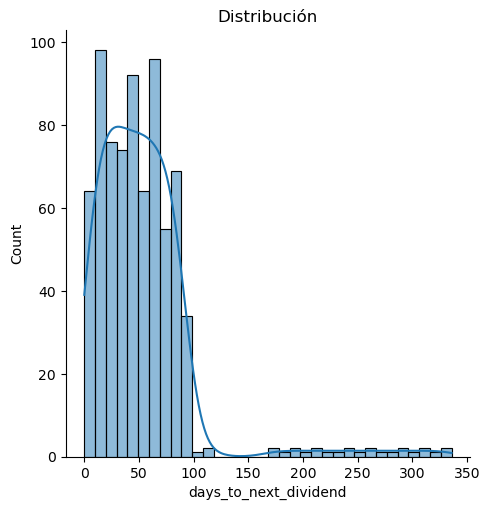

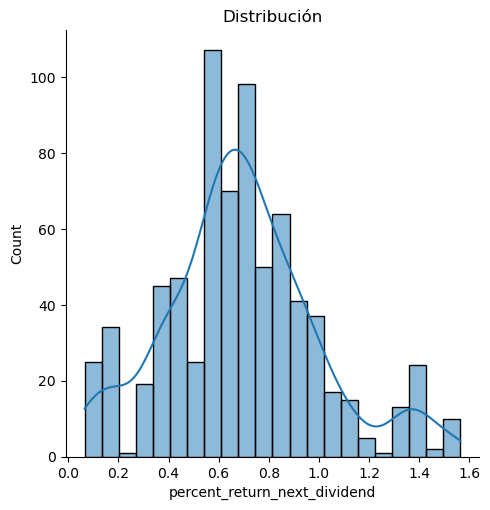

In [11]:
#Distribución cada atributo de la base de datos
columns_df = list(dataset.columns)
for i in range(len(columns_df)):
    colum = columns_df[i]
    sns.displot(dataset[colum],kde=True)
    plt.title('Distribución')

In [17]:
#Modificar ciertas columnas
datos = dataset.copy()
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

In [18]:
datos['open'] = datos['open'].astype('string')
datos['high'] = datos['high'].astype('string')
datos['low'] = datos['low'].astype('string')
datos['close'] = datos['close'].astype('string')
datos['next_weeks_open'] = datos['next_weeks_open'].astype('string')
datos['next_weeks_close'] = datos['next_weeks_close'].astype('string')

In [19]:
texto  = "TEXTO"
for columna in datos:
    lista = []
    for index, row in datos.iterrows():
        if type(row[columna]) == type(texto):
            if '$' in row[columna]:
                row[columna]=  row[columna].replace('$','')
                lista.append(row[columna])
    if len(lista) != 0:
        datos[columna] = lista

In [15]:
#Imputación Media
def sub_I_M(V,P,Valor):
    P_adelante=[]
    P_atras=[]
    for i in range(len(V)): #Recorrido de los indices de la columna
        if i == P[0]: #Si el indice coincide con el indice con valor nan
            #print(i)
            for k in (V[i+1:]): #Recorrido de los valores posteriores desde el indice con valor nan
                P_adelante.append(k) #Lista de valores secuenciales al valor aleatorio propuesto
            for j in (V[:i]): #Recorrido de los valores anteriores del indice aleatorio con valor nan
                P_atras.append(j) #Lista de valores secuenciales al valor aleatorio propuesto 
            print('Lista de valores P_adelante secuenciales al indice con valor nan:', P_adelante)
            new_P_atras = [num for num in reversed(P_atras)] #Invertir la lista
            if len(P_atras)<75:
                for m in range(len(V)-1,P[0],-1): #Recorrido de los valores desde el indice aleatorio
                    new_P_atras.append(V[m]) #Lista de valores secuenciales al valor aleatorio propuesto 
            print('Lista de valores P_atras secuenciales al indice con valor nan:', new_P_atras)       
            P_adelante = [x for x in P_adelante if math.isnan(x) == False] #Eliminar NaN de la lista P_adelante
            new_P_atras = [x for x in new_P_atras if math.isnan(x) == False] #Eliminar NaN de la lista P_atras
            v = []
            v_atras =v_at=0 #Condición inicial de variables
            v_adelante = v_ad= 0 #Condición inicial del contador
            for n,i in enumerate(new_P_atras):
                if v_atras != Valor: #Mientras el v_atras no sea igual a Valor(K)
                    v.append(i) #Crear a la lista el valor de la lista 
                    v_at = v_at + i  #Sumar cada uno de los valores agregado a la lista
                    v_atras = v_atras + 1  #Sumar 1 al contador
            for n,i in enumerate(P_adelante):
                if v_adelante != Valor: #Mientras al v_adelante no sea igual al Valor(K)
                    v.append(i) #Crear a la lista el valor de la lista
                    v_ad = v_ad + i   #Sumar cada uno de los valores agregados a la lista
                    v_adelante = v_adelante + 1 #Sumar 1 al contador
            v_medio = ((v_ad + v_at)/len(v))
            return v_medio

In [20]:
def IM(Copy_Media,Valor,col):
    for columna in Copy_Media:
        if columna == col:
            print('')
            print('Columna: ',columna)
            P = [] #posición
            P_adelante = []
            P_atras = []
            V = []
            for index, row in Copy_Media.iterrows():
                V.append(row[columna])

            print('Lista original:', V)
            for n,i in enumerate(V):
                if (math.isnan(i)):
                    P.append(n) #Guardar indices con valores nan
            print('Lista de indices con valores nan:', P)
            count = 0
            for n,i in enumerate(V):
                if (math.isnan(i)):
                    count = count + 1
                    print('Indice: ', n, 'Valor:', V[n])
                    v_medio = sub_I_M(V,P,Valor)
                    print('Valor Medio:', v_medio, 'rodear a dos decimales:', round(v_medio,2))
                    V[n] = round(v_medio,2)
                    print('Lista modificada:', V)
                    print('')
                    P.pop(0)
            Copy_Media[columna] = V
    return Copy_Media,count

In [21]:
def Imputacion_Media(datos,Valor,col):
    Copy_Media = datos.copy()
    Copy_Media,contador_col1 = IM(Copy_Media,Valor,col)
    return Copy_Media,contador_col1

In [22]:
# Imputación de las columnas con valores faltantes
datos_Imp_Media,contador_col1 = IM(datos,3,'percent_change_volume_over_last_wk')
print('contador NaN:',contador_col1)
datos_Imp_Media,contador_col2 = IM(datos_Imp_Media,3,'previous_weeks_volume')
print('contador NaN:',contador_col2)


Columna:  percent_change_volume_over_last_wk
Lista original: [nan, 1.380223028, -43.02495926, 9.355500109, 1.987451735, -25.71219489, -30.22669579, 66.17769355, -17.66315005, 4.419900447, 14.03060136, -26.71060729, nan, -42.54425775, 49.82309945, 32.4601012, -23.18924001, 10.74718341, -34.70429674, 38.82118305, -1.687362023, -3.518293442, 11.01759959, -26.24483548, nan, -48.05394212, 57.1263549, 18.02869553, -34.81169434, -4.218921319, -26.68647494, 64.2255158, 4.832201474, -7.160128578, 16.3954667, -17.89403211, nan, -47.64583288, 29.11022794, 7.325550716, -28.18843105, -1.416650312, -38.58744486, 55.41453261, -1.794490244, 15.08405791, -1.593350187, -9.427520474, nan, -18.3488805, 45.38320064, 21.91217419, -10.76405188, -11.34736007, -40.89587026, 72.34217163, 6.05678948, 29.35373297, 40.35219927, -30.18361413, nan, -49.03298835, 25.20783263, 37.15945212, -11.04784237, 323.2821517, -60.98831052, -26.91703665, 5.907103532, 3.029021246, 42.72113826, -35.93005207, nan, -20.51894731, -1

In [23]:
datos_Imp_Media

quarter stock        date   open   high    low  close     volume  \
0          1    AA  01/07/2011  15.82  16.72  15.78  16.42  239655616   
1          1    AA   1/14/2011  16.71  16.71  15.64  15.97  242963398   
2          1    AA   1/21/2011  16.19  16.38  15.60  15.79  138428495   
3          1    AA   1/28/2011  15.87  16.63  15.82  16.13  151379173   
4          1    AA  02/04/2011  16.18  17.39  16.18  17.14  154387761   
..       ...   ...         ...    ...    ...    ...    ...        ...   
745        2   XOM   5/27/2011  80.22  82.63  80.07  82.63   68230855   
746        2   XOM  06/03/2011  83.28  83.75  80.18  81.18   78616295   
747        2   XOM  06/10/2011  80.93  81.87  79.72  79.78   92380844   
748        2   XOM   6/17/2011  80.00  80.82  78.33  79.02  100521400   
749        2   XOM   6/24/2011  78.65  81.12  76.78  76.78  118679791   

     percent_change_price  percent_change_volume_over_last_wk  \
0                 3.79267                            2.020000   
1                -4.42849                            1.380223   
2                -2.47066                          -43.024959   
3                 1.63831                            9.355500   
4                 5.93325                            1.987452   
..                    ...                                 ...   
745               3.00424                          -21.355713   
746              -2.52161                           15.221032   
747              -1.42098                           17.508519   
748              -1.22500                            8.811952   
749              -2.37762                           18.064204   

     previous_weeks_volume next_weeks_open next_weeks_close  \
0              148761008.0           16.71            15.97   
1              239655616.0           16.19            15.79   
2              242963398.0           15.87            16.13   
3              138428495.0           16.18            17.14   
4              151379173.0           17.33            17.37   
..                     ...             ...              ...   
745             86758820.0           83.28            81.18   
746             68230855.0           80.93            79.78   
747             78616295.0           80.00            79.02   
748             92380844.0           78.65            76.78   
749            100521400.0           76.88            82.01   

     percent_change_next_weeks_price  days_to_next_dividend  \
0                          -4.428490                     26   
1                          -2.470660                     19   
2                           1.638310                     12   
3                           5.933250                      5   
4                           0.230814                     97   
..                               ...                    ...   
745                        -2.521610                     75   
746                        -1.420980                     68   
747                        -1.225000                     61   
748                        -2.377620                     54   
749                         6.672740                     47   

     percent_return_next_dividend  
0                        0.182704  
1                        0.187852  
2                        0.189994  
3                        0.185989  
4                        0.175029  
..                            ...  
745                      0.568801  
746                      0.578960  
747                      0.589120  
748                      0.594786  
749                      0.612139  

[750 rows x 16 columns]

In [24]:
datos_Imp_Media['open'] = datos_Imp_Media['open'].astype('float64')
datos_Imp_Media['high'] = datos_Imp_Media['high'].astype('float64')
datos_Imp_Media['low'] = datos_Imp_Media['low'].astype('float64')
datos_Imp_Media['close'] = datos_Imp_Media['close'].astype('float64')
datos_Imp_Media['next_weeks_open'] = datos_Imp_Media['next_weeks_open'].astype('float64')
datos_Imp_Media['next_weeks_close'] = datos_Imp_Media['next_weeks_close'].astype('float64')

In [ ]:
#Comparación de la distribución antes y despues de la Imputación

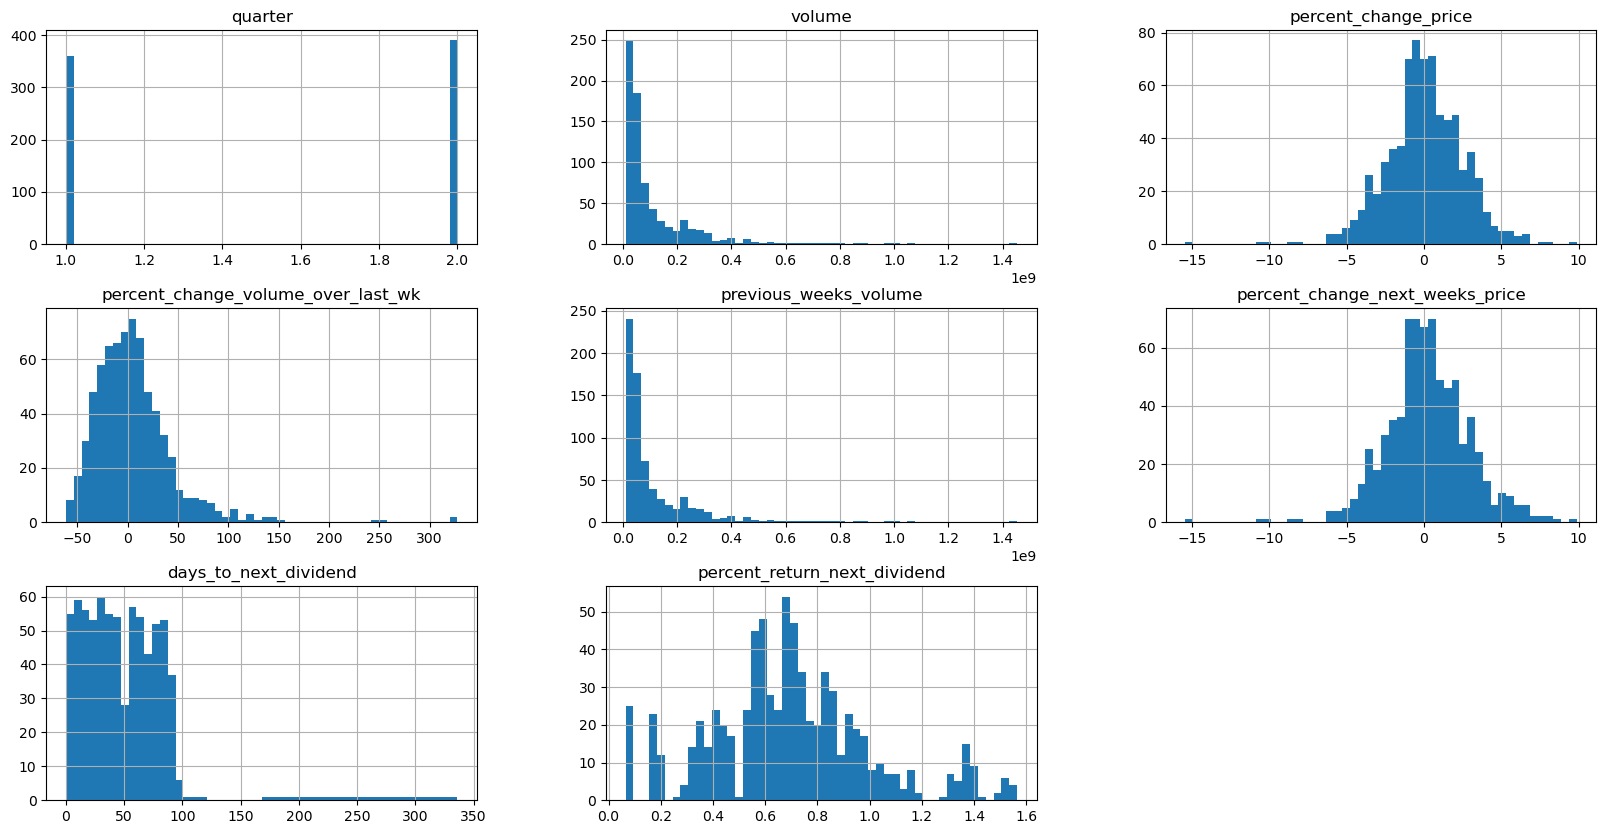

In [25]:
dataset.hist(figsize=(20,10),bins = 50)
plt.show()

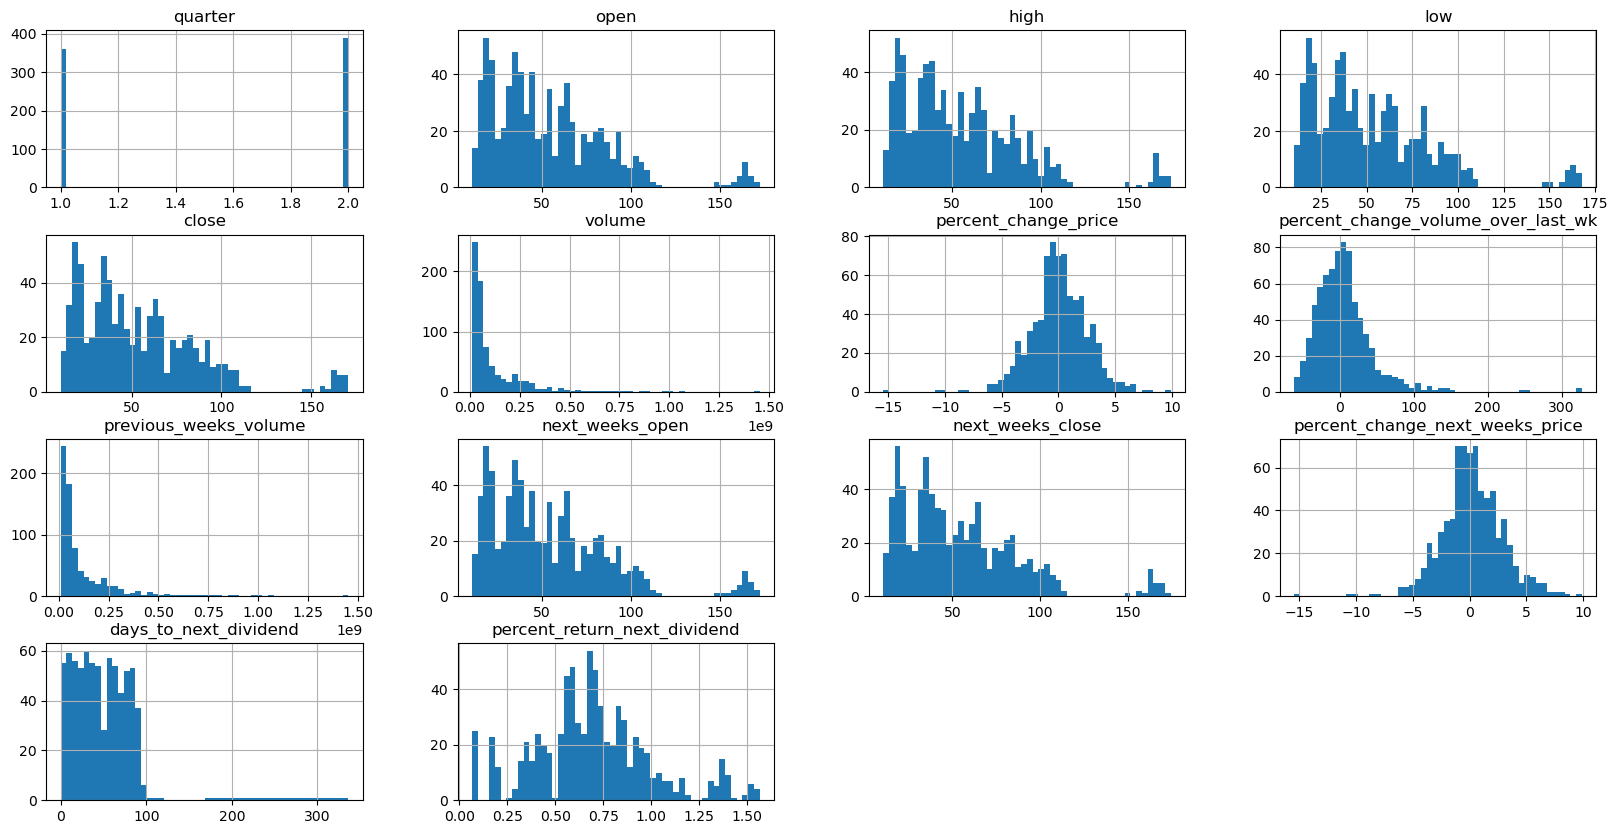

In [26]:
datos_Imp_Media.hist(figsize=(20,10),bins = 50)
plt.show()

C:\Users\gaby9\AppData\Local\Temp\ipykernel_28264\4288045962.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df= datos_Imp_Media.corr(method='pearson')


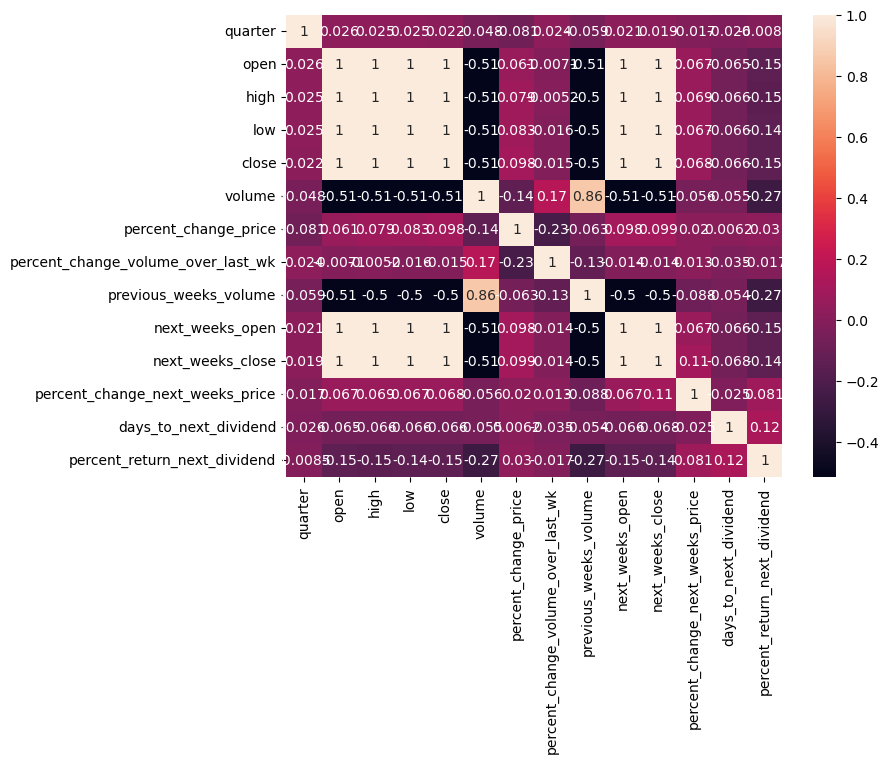

In [27]:
df= datos_Imp_Media.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True)
plt.show()

In [28]:
#Observaciones de cada Atributo

print('Atributo -- open --')
print(datos_Imp_Media['open'].unique())
print('')
print('Atributo -- high --')
print(datos_Imp_Media['high'].unique())
print('')
print('Atributo -- low --')
print(datos_Imp_Media['low'].unique())
print('')
print('Atributo -- close --')
print(datos_Imp_Media['close'].unique())
print('')
print('Atributo -- next_weeks_open --')
print(datos_Imp_Media['next_weeks_open'].unique())
print('')
print('Atributo -- next_weeks_close --')
print(datos_Imp_Media['next_weeks_close'].unique())
print('')
print('Atributo -- stock --')
print(datos_Imp_Media['stock'].unique())
print('')

Atributo -- open --
[ 15.82  16.71  16.19  15.87  16.18  17.33  17.39  16.98  16.81  16.58
  15.95  16.38  43.3   44.2   46.03  46.05  44.13  43.96  46.42  44.94
  43.73  43.86  44.75  66.15  69.42  70.86  71.52  69.26  71.43  72.7
  72.35  72.47  71.6   71.17  70.29  13.85  14.17  15.08  14.25  13.71
  14.51  14.77  14.38  14.27  14.18  14.26  14.2   94.38  93.21  94.16
  92.71  96.13  99.62 103.56 104.86 102.72 103.42 102.59 106.9   20.45
  20.94  21.22  20.84  20.93  22.11  18.84  18.73  18.62  18.36  17.81
  17.34  91.66  90.95  92.94  93.89  93.85  97.28  95.5   99.23 102.28
 104.12  99.16 103.86  50.05  48.3   49.53  48.44  50.15  52.62  54.44
  54.95  54.22  54.1   53.18  53.8   37.74  39.01  39.07  39.64  39.04
  40.8   43.19  42.83  43.02  43.53  42.64  41.46  18.49  18.61  18.98
  19.93  20.13  20.77  21.51  20.88  20.95  20.4   19.96  19.68  35.2
  34.16  35.97  36.46  37.13  36.8   37.47  39.3   37.15  37.26  36.92
  36.29  42.22  44.86  46.14  46.69  45.41  47.71  48.45  4

In [29]:
#Modificación a datos categoricos
datos_Imp_Media =  datos_Imp_Media[datos_Imp_Media.columns].replace({'AA':1, 'AXP':2, 'BA':3,'BAC':4, 'CAT':5, 'CSCO':6, 'CVX':7, 'DD':8, 'DIS':9, 'GE':10, 'HD':11, 'HPQ':12, 'IBM':13, 'INTC':14,'JNJ':15,'JPM':16,'KRFT':17,'KO':18,'MCD':19,'MMM':20,'MRK':21, 'MSFT':22,'PFE':23, 'PG':24, 'T':25, 'TRV':26, 'UTX':27,'VZ':28,'WMT':29, 'XOM':30})
datos_Imp_Media

quarter  stock        date   open   high    low  close     volume  \
0          1      1  01/07/2011  15.82  16.72  15.78  16.42  239655616   
1          1      1   1/14/2011  16.71  16.71  15.64  15.97  242963398   
2          1      1   1/21/2011  16.19  16.38  15.60  15.79  138428495   
3          1      1   1/28/2011  15.87  16.63  15.82  16.13  151379173   
4          1      1  02/04/2011  16.18  17.39  16.18  17.14  154387761   
..       ...    ...         ...    ...    ...    ...    ...        ...   
745        2     30   5/27/2011  80.22  82.63  80.07  82.63   68230855   
746        2     30  06/03/2011  83.28  83.75  80.18  81.18   78616295   
747        2     30  06/10/2011  80.93  81.87  79.72  79.78   92380844   
748        2     30   6/17/2011  80.00  80.82  78.33  79.02  100521400   
749        2     30   6/24/2011  78.65  81.12  76.78  76.78  118679791   

     percent_change_price  percent_change_volume_over_last_wk  \
0                 3.79267                            2.020000   
1                -4.42849                            1.380223   
2                -2.47066                          -43.024959   
3                 1.63831                            9.355500   
4                 5.93325                            1.987452   
..                    ...                                 ...   
745               3.00424                          -21.355713   
746              -2.52161                           15.221032   
747              -1.42098                           17.508519   
748              -1.22500                            8.811952   
749              -2.37762                           18.064204   

     previous_weeks_volume  next_weeks_open  next_weeks_close  \
0              148761008.0            16.71             15.97   
1              239655616.0            16.19             15.79   
2              242963398.0            15.87             16.13   
3              138428495.0            16.18             17.14   
4              151379173.0            17.33             17.37   
..                     ...              ...               ...   
745             86758820.0            83.28             81.18   
746             68230855.0            80.93             79.78   
747             78616295.0            80.00             79.02   
748             92380844.0            78.65             76.78   
749            100521400.0            76.88             82.01   

     percent_change_next_weeks_price  days_to_next_dividend  \
0                          -4.428490                     26   
1                          -2.470660                     19   
2                           1.638310                     12   
3                           5.933250                      5   
4                           0.230814                     97   
..                               ...                    ...   
745                        -2.521610                     75   
746                        -1.420980                     68   
747                        -1.225000                     61   
748                        -2.377620                     54   
749                         6.672740                     47   

     percent_return_next_dividend  
0                        0.182704  
1                        0.187852  
2                        0.189994  
3                        0.185989  
4                        0.175029  
..                            ...  
745                      0.568801  
746                      0.578960  
747                      0.589120  
748                      0.594786  
749                      0.612139  

[750 rows x 16 columns]

In [ ]:
# Normalización

In [30]:
def norm_min_max(datos):
    lim_sup = []
    lim_inf = []
    rangoDatos =[]
    maxNorm = 1
    minNorm = 0
    rango = maxNorm - minNorm
    for i in range (0,datos.columns.size):
        lim_sup.append(datos.iloc[:,i].max())
        lim_inf.append(datos.iloc[:,i].min())
        rangoDatos.append(lim_sup[i] - lim_inf[i])
    nombres = datos.columns.values.tolist()
    datosNorm = pd.DataFrame(columns = nombres)

    for j in range(len(datos.columns)):
        varNorm = []
        var = datos.iloc[:,j]
        for i in range(len(datos)):
            D = var[i] - lim_inf[j]
            DPct = D/rangoDatos[j]
            dNorm = rango*DPct
            varNorm.append(minNorm+dNorm)
        datosNorm.iloc[:,j] = varNorm
    datos = datosNorm
    return datos

In [31]:
d_datos = datos_Imp_Media.drop(['date'],axis=1) #Eliminar el atributo 
#c_datos = datos_Imp_Media['date']
c_datos = pd.to_datetime(datos_Imp_Media.date)

In [32]:
D_datos = norm_min_max(d_datos)
D_datos

C:\Users\gaby9\AppData\Local\Temp\ipykernel_28264\1809094097.py:23: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  datosNorm.iloc[:,j] = varNorm


quarter  stock      open      high       low     close    volume  \
0        0.0    0.0  0.032380  0.035547  0.034176  0.036861  0.159267   
1        0.0    0.0  0.037890  0.035486  0.033287  0.034050  0.161558   
2        0.0    0.0  0.034671  0.033456  0.033033  0.032925  0.089151   
3        0.0    0.0  0.032689  0.034994  0.034430  0.035049  0.098122   
4        0.0    0.0  0.034609  0.039668  0.036717  0.041359  0.100206   
..       ...    ...       ...       ...       ...       ...       ...   
745      1.0    1.0  0.431092  0.440898  0.442574  0.450519  0.040529   
746      1.0    1.0  0.450037  0.447786  0.443273  0.441459  0.047722   
747      1.0    1.0  0.435488  0.436224  0.440351  0.432713  0.057256   
748      1.0    1.0  0.429730  0.429766  0.431521  0.427965  0.062895   
749      1.0    1.0  0.421372  0.431611  0.421675  0.413970  0.075472   

     percent_change_price  percent_change_volume_over_last_wk  \
0                0.759355                            0.163185   
1                0.434474                            0.161540   
2                0.511842                            0.047341   
3                0.674219                            0.182050   
4                0.843945                            0.163101   
..                    ...                                 ...   
745              0.728198                            0.103069   
746              0.509829                            0.197135   
747              0.553323                            0.203017   
748              0.561068                            0.180652   
749              0.515519                            0.204446   

     previous_weeks_volume  next_weeks_open  next_weeks_close  \
0                 0.096308         0.038307          0.033228   
1                 0.159267         0.035089          0.032130   
2                 0.161558         0.033108          0.034203   
3                 0.089151         0.035027          0.040361   
4                 0.098122         0.042144          0.041763   
..                     ...              ...               ...   
745               0.053362         0.450275          0.430801   
746               0.040529         0.435732          0.422266   
747               0.047722         0.429977          0.417632   
748               0.057256         0.421623          0.403975   
749               0.062895         0.410669          0.435861   

     percent_change_next_weeks_price  days_to_next_dividend  \
0                           0.434474               0.077381   
1                           0.511842               0.056548   
2                           0.674219               0.035714   
3                           0.843945               0.014881   
4                           0.618598               0.288690   
..                               ...                    ...   
745                         0.509829               0.223214   
746                         0.553323               0.202381   
747                         0.561068               0.181548   
748                         0.515519               0.160714   
749                         0.873168               0.139881   

     percent_return_next_dividend  
0                        0.078158  
1                        0.081593  
2                        0.083022  
3                        0.080350  
4                        0.073037  
..                            ...  
745                      0.335790  
746                      0.342569  
747                      0.349348  
748                      0.353129  
749                      0.364708  

[750 rows x 15 columns]

In [ ]:
#Extracción de los atributos con mayor correlación

In [101]:
c_datos = pd.to_datetime(datos_Imp_Media.date)

In [37]:
DD_datos = D_datos[['open','high','low','close','next_weeks_open','next_weeks_close','volume','previous_weeks_volume']]
DD_datos.insert(0, "date", c_datos, allow_duplicates=False)
DD_datos.set_index('date', inplace=True)
DD_datos

open      high       low     close  next_weeks_open  \
date                                                                  
2011-01-07  0.032380  0.035547  0.034176  0.036861         0.038307   
2011-01-14  0.037890  0.035486  0.033287  0.034050         0.035089   
2011-01-21  0.034671  0.033456  0.033033  0.032925         0.033108   
2011-01-28  0.032689  0.034994  0.034430  0.035049         0.035027   
2011-02-04  0.034609  0.039668  0.036717  0.041359         0.042144   
...              ...       ...       ...       ...              ...   
2011-05-27  0.431092  0.440898  0.442574  0.450519         0.450275   
2011-06-03  0.450037  0.447786  0.443273  0.441459         0.435732   
2011-06-10  0.435488  0.436224  0.440351  0.432713         0.429977   
2011-06-17  0.429730  0.429766  0.431521  0.427965         0.421623   
2011-06-24  0.421372  0.431611  0.421675  0.413970         0.410669   

            next_weeks_close    volume  previous_weeks_volume  
date                                                           
2011-01-07          0.033228  0.159267               0.096308  
2011-01-14          0.032130  0.161558               0.159267  
2011-01-21          0.034203  0.089151               0.161558  
2011-01-28          0.040361  0.098122               0.089151  
2011-02-04          0.041763  0.100206               0.098122  
...                      ...       ...                    ...  
2011-05-27          0.430801  0.040529               0.053362  
2011-06-03          0.422266  0.047722               0.040529  
2011-06-10          0.417632  0.057256               0.047722  
2011-06-17          0.403975  0.062895               0.057256  
2011-06-24          0.435861  0.075472               0.062895  

[750 rows x 8 columns]

Columna: open


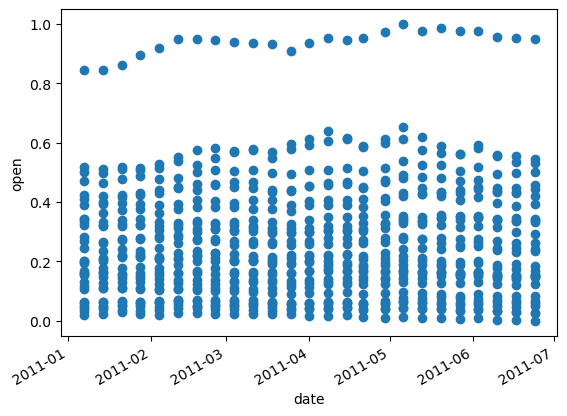


Columna: high


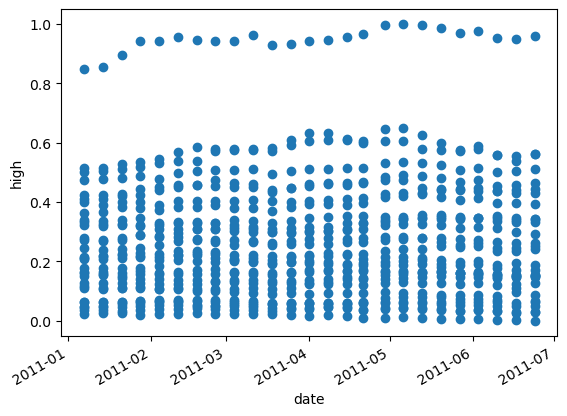


Columna: low


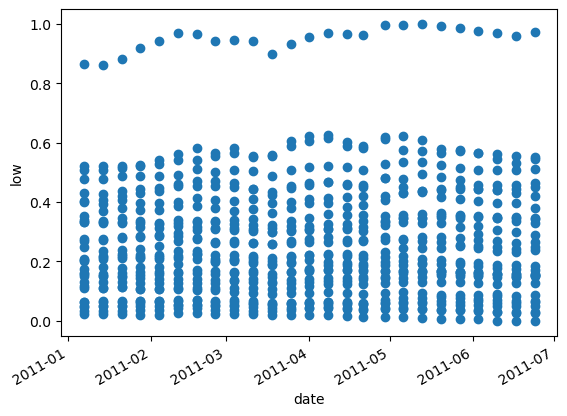


Columna: close


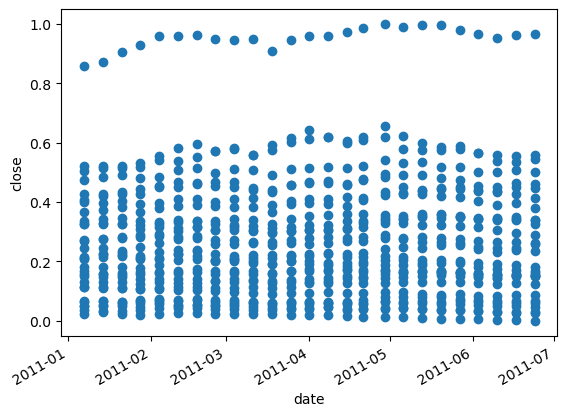


Columna: next_weeks_open


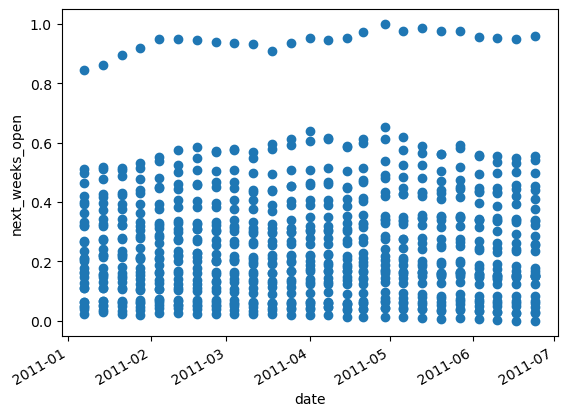


Columna: next_weeks_close


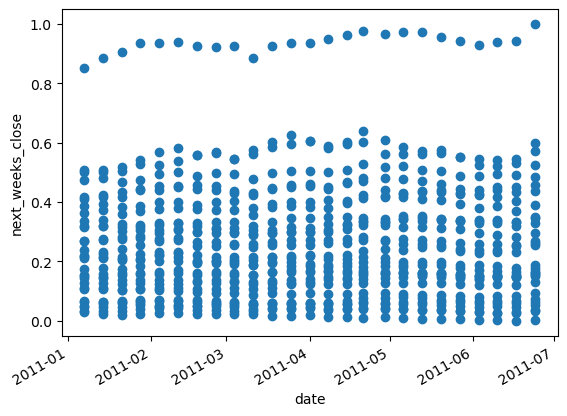


Columna: volume


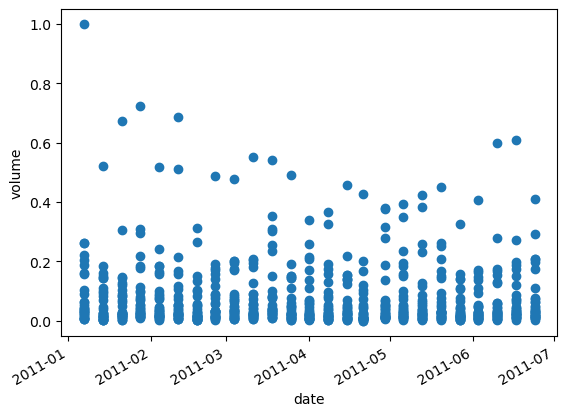


Columna: previous_weeks_volume


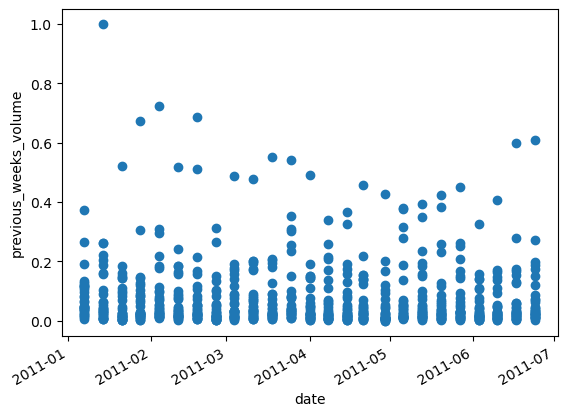

In [40]:
for columna_1 in DD_datos:
    print('Columna:',columna_1)
    DD_datos[columna_1].dropna().plot(marker='o', ls='');
    plt.ylabel(columna_1)
    plt.show()
    print('')

In [113]:
DD_datos.index = (DD_datos.index - pd.to_datetime('1970-01-01')).days

In [ ]:
#Regresión Polinomial

In [43]:
def create_features(X, degree=2, standardize=True):
    X = torch.tensor(X)
    if len(X.shape) == 1:
        X = torch.unsqueeze(X,1)
    # Concatenate a column of ones to has the bias in X
    ones_col = torch.ones((X.shape[0], 1), dtype=torch.float32)
    X_d = torch.cat([ones_col, X], axis=1)
    for i in range(1, degree):
        X_pow = X.pow(i + 1)
        # If we use the gradient descent method, we need to
        # standardize the features to avoid exploding gradients
        if standardize:
            X_pow -= X_pow.mean()
            std = X_pow.std()
            if std != 0:
                X_pow /= std
        X_d = torch.cat([X_d, X_pow], axis=1)
    return X_d

In [44]:
def predict(features, weights):
    return features.mm(weights)

In [45]:
def normal_equation(y_true, X):
    XTX_inv = (X.T.mm(X)).inverse()
    XTy = X.T.mm(y_true)
    weights = XTX_inv.mm(XTy)
    return weights

In [165]:
def metricas(y,y_):
    d = y - y_
    mse_f = np.mean(d**2)
    mae_f = np.mean(abs(d))
    rmse_f = np.sqrt(mse_f)
    r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))
    rse_f = sum(d**2)/sum((y-np.mean(y))**2)
    rae_f = sum(abs(d))/sum(abs(y-np.mean(y)))

    SPA = sum((y_-np.mean(y_))*(y-np.mean(y)))/(len(y_)-1)
    SP = sum((y_-np.mean(y_))**2)/(len(y_)-1)
    SA = sum((y-np.mean(y))**2)/(len(y)-1)
    CC_f = SPA/np.sqrt(SP*SA)

    print("Métricas:")
    print("R^2:", r2_f)
    print("Root Mean Square Error(RMSE):", rmse_f)
    print("Mean Square Error(MSE):", mse_f)
    print("Mean Absolute Error(MAE):", mae_f)
    print("Relative Squared Error(RSE):",rse_f)
    print("Relative Absolute Error(RAE):",rae_f)
    print("Correlation coefficient(CC):",CC_f)

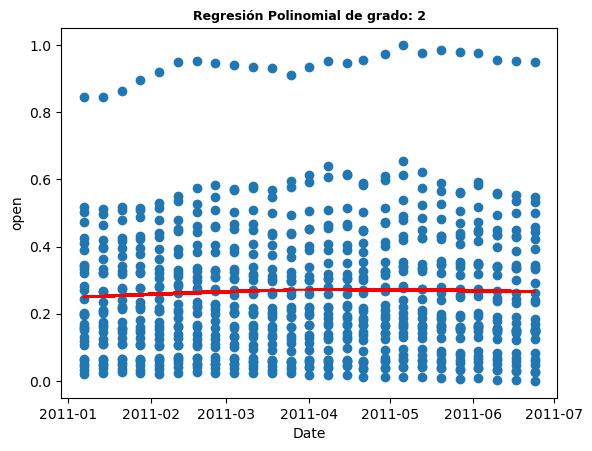

Métricas:
R^2: 0.0010732069718238924
Root Mean Square Error(RMSE): 0.20182997917709622
Mean Square Error(MSE): 0.0407353404946271
Mean Absolute Error(MAE): 0.1577592925302696
Relative Squared Error(RSE): 0.9989267930281761
Relative Absolute Error(RAE): 1.0000017276564177
Correlation coefficient(CC): 0.03275983783277398



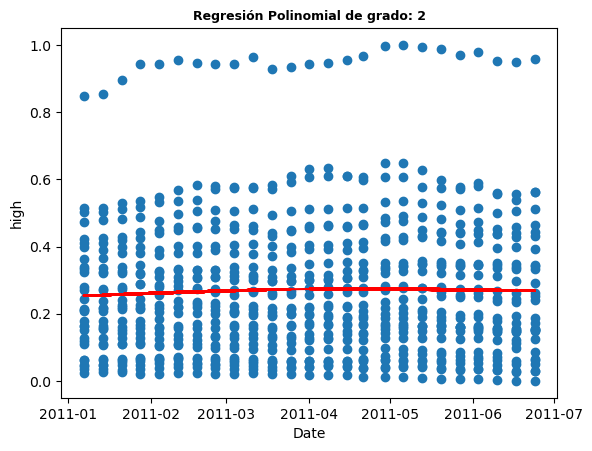

Métricas:
R^2: 0.0009069513125545825
Root Mean Square Error(RMSE): 0.20405157535039492
Mean Square Error(MSE): 0.04163704540297789
Mean Absolute Error(MAE): 0.15927039244907173
Relative Squared Error(RSE): 0.9990930486874454
Relative Absolute Error(RAE): 1.0000564165992287
Correlation coefficient(CC): 0.030115632683957186



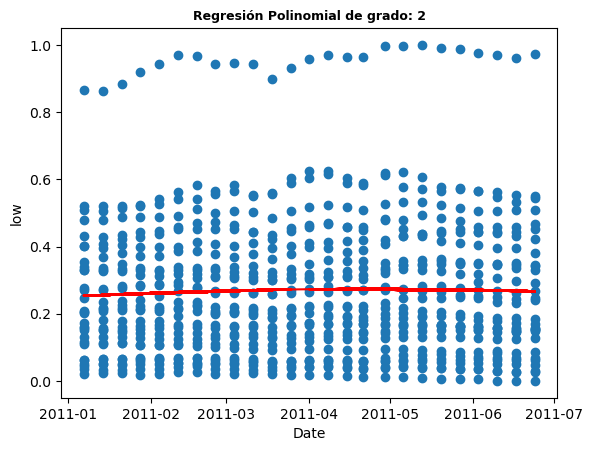

Métricas:
R^2: 0.0008121577147887082
Root Mean Square Error(RMSE): 0.20381667218506558
Mean Square Error(MSE): 0.04154123586059449
Mean Absolute Error(MAE): 0.15932112092816655
Relative Squared Error(RSE): 0.9991878422852113
Relative Absolute Error(RAE): 1.0001207903681568
Correlation coefficient(CC): 0.02849838091646322



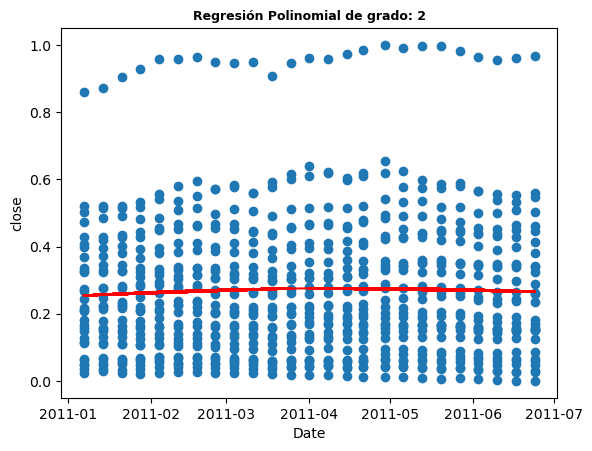

Métricas:
R^2: 0.0008792345610346697
Root Mean Square Error(RMSE): 0.20462646591959188
Mean Square Error(MSE): 0.041871990554741896
Mean Absolute Error(MAE): 0.15981225224414589
Relative Squared Error(RSE): 0.9991207654389653
Relative Absolute Error(RAE): 0.9999358671464914
Correlation coefficient(CC): 0.02965188981496053



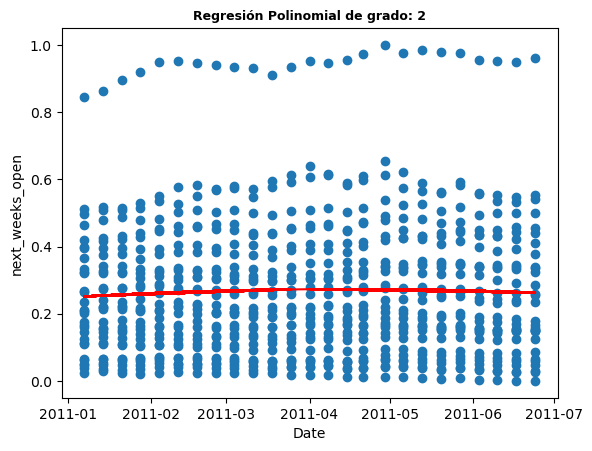

Métricas:
R^2: 0.0009049764512961689
Root Mean Square Error(RMSE): 0.2026203724799743
Mean Square Error(MSE): 0.04105501534392353
Mean Absolute Error(MAE): 0.1582703742761831
Relative Squared Error(RSE): 0.9990950235487038
Relative Absolute Error(RAE): 0.9998956677077848
Correlation coefficient(CC): 0.030082827086358812



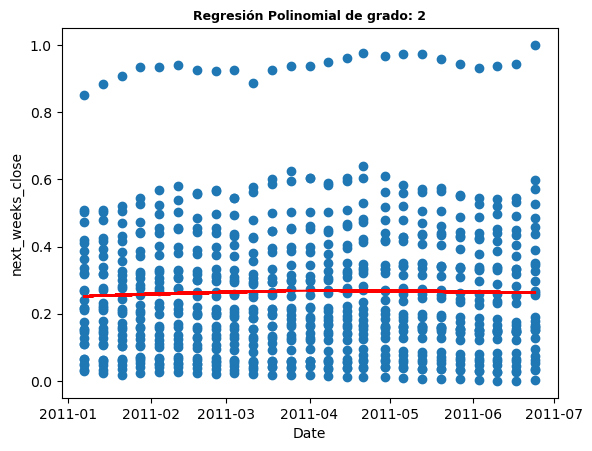

Métricas:
R^2: 0.0005628870321193746
Root Mean Square Error(RMSE): 0.20110578389642902
Mean Square Error(MSE): 0.040443536316597216
Mean Absolute Error(MAE): 0.15699330065073874
Relative Squared Error(RSE): 0.9994371129678806
Relative Absolute Error(RAE): 1.000106594986359
Correlation coefficient(CC): 0.02372524054957351



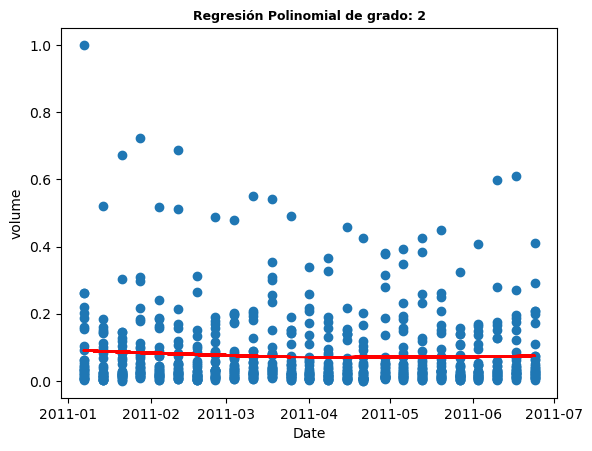

Métricas:
R^2: 0.0031566788774476384
Root Mean Square Error(RMSE): 0.10949654510936625
Mean Square Error(MSE): 0.011989493390887479
Mean Absolute Error(MAE): 0.07137999164901068
Relative Squared Error(RSE): 0.9968433211225524
Relative Absolute Error(RAE): 0.9963709639756004
Correlation coefficient(CC): 0.05618432947545743



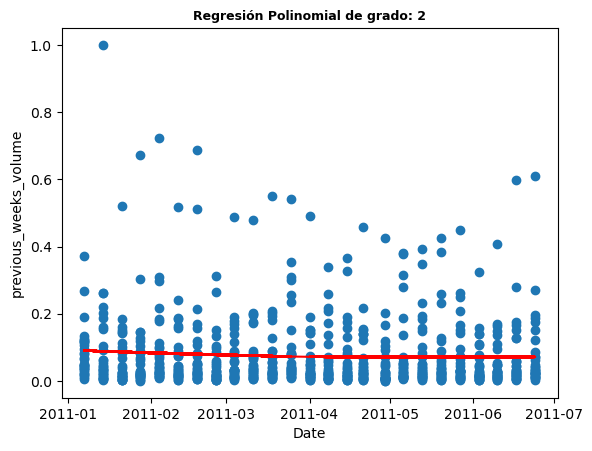

Métricas:
R^2: 0.003374040693459368
Root Mean Square Error(RMSE): 0.10893839966528829
Mean Square Error(MSE): 0.011867574921634082
Mean Absolute Error(MAE): 0.07076086197762962
Relative Squared Error(RSE): 0.9966259593065406
Relative Absolute Error(RAE): 0.9944428023035861
Correlation coefficient(CC): 0.05808649325285905



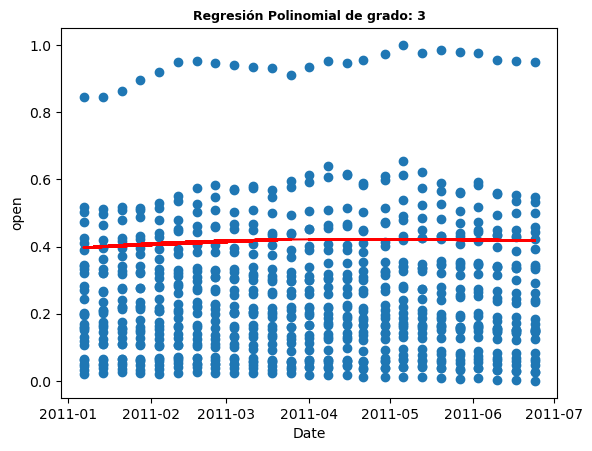

Métricas:
R^2: -0.549463745073979
Root Mean Square Error(RMSE): 0.251367747774682
Mean Square Error(MSE): 0.06318574462131617
Mean Absolute Error(MAE): 0.21473985060292136
Relative Squared Error(RSE): 1.549463745073979
Relative Absolute Error(RAE): 1.361189050454188
Correlation coefficient(CC): 0.03090495921193459



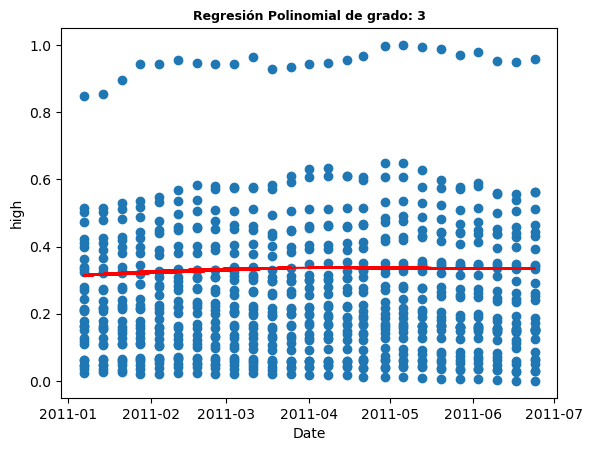

Métricas:
R^2: -0.09500514724262432
Root Mean Square Error(RMSE): 0.21362155087886975
Mean Square Error(MSE): 0.04563416699989354
Mean Absolute Error(MAE): 0.17470274901182975
Relative Squared Error(RSE): 1.0950051472426243
Relative Absolute Error(RAE): 1.0969559530825597
Correlation coefficient(CC): 0.028281914434647133



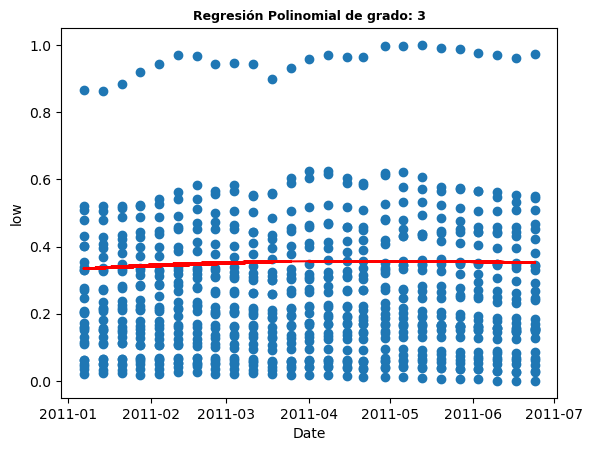

Métricas:
R^2: -0.16622702931689792
Root Mean Square Error(RMSE): 0.22019511866002925
Mean Square Error(MSE): 0.048485890281704365
Mean Absolute Error(MAE): 0.18228758158947528
Relative Squared Error(RSE): 1.166227029316898
Relative Absolute Error(RAE): 1.1442902178410126
Correlation coefficient(CC): 0.026307599349762345



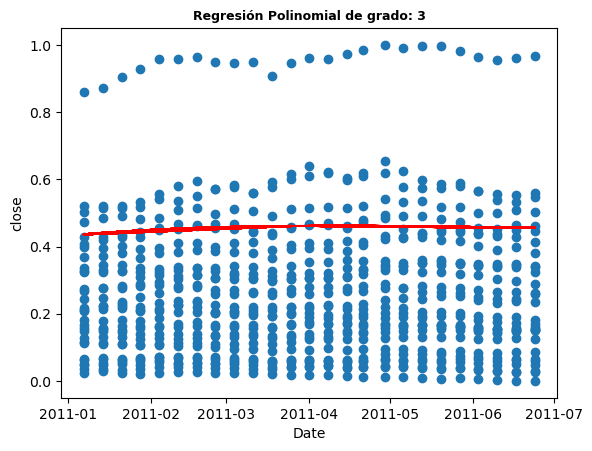

Métricas:
R^2: -0.8233641036392108
Root Mean Square Error(RMSE): 0.2764327608969398
Mean Square Error(MSE): 0.07641507129710468
Mean Absolute Error(MAE): 0.23871409593344436
Relative Squared Error(RSE): 1.8233641036392108
Relative Absolute Error(RAE): 1.4936200645782665
Correlation coefficient(CC): 0.027073501124720657



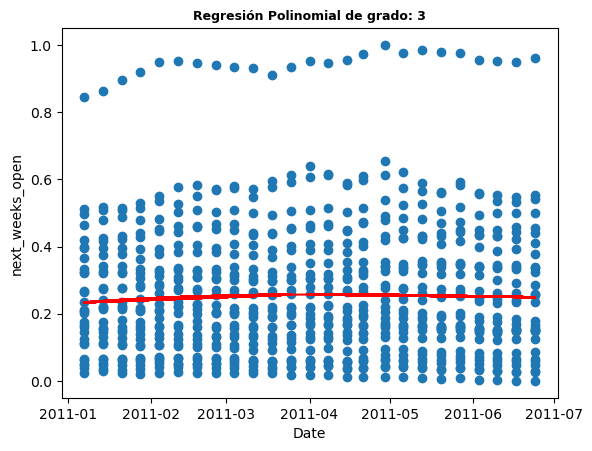

Métricas:
R^2: -0.005312142012186216
Root Mean Square Error(RMSE): 0.20324982272262795
Mean Square Error(MSE): 0.041310490436779694
Mean Absolute Error(MAE): 0.15645538802351613
Relative Squared Error(RSE): 1.0053121420121862
Relative Absolute Error(RAE): 0.9884292331378889
Correlation coefficient(CC): 0.02810237841669576



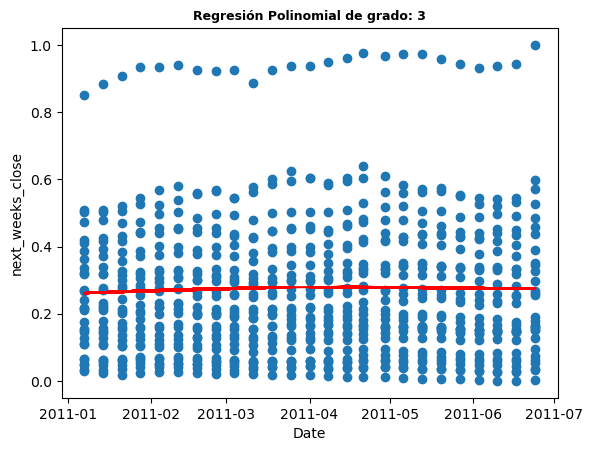

Métricas:
R^2: -0.0022299482585828034
Root Mean Square Error(RMSE): 0.20138657370143487
Mean Square Error(MSE): 0.04055655206720346
Mean Absolute Error(MAE): 0.15875308733736157
Relative Squared Error(RSE): 1.0022299482585828
Relative Absolute Error(RAE): 1.0113171005542119
Correlation coefficient(CC): 0.023358342611804125



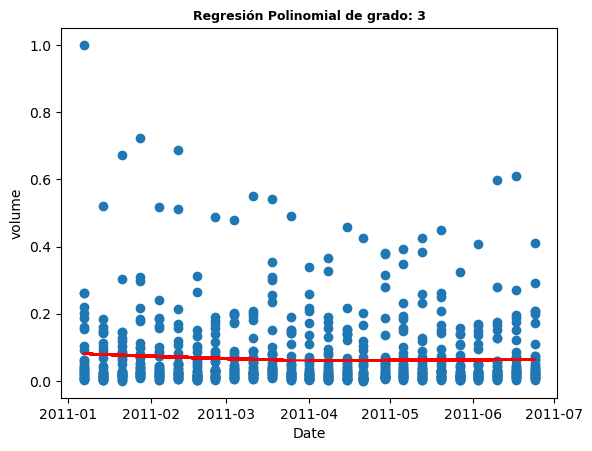

Métricas:
R^2: -0.0043753377724748965
Root Mean Square Error(RMSE): 0.10990943736333417
Mean Square Error(MSE): 0.012080084421524676
Mean Absolute Error(MAE): 0.06749050736647033
Relative Squared Error(RSE): 1.004375337772475
Relative Absolute Error(RAE): 0.9420788701488229
Correlation coefficient(CC): 0.056174112820633976



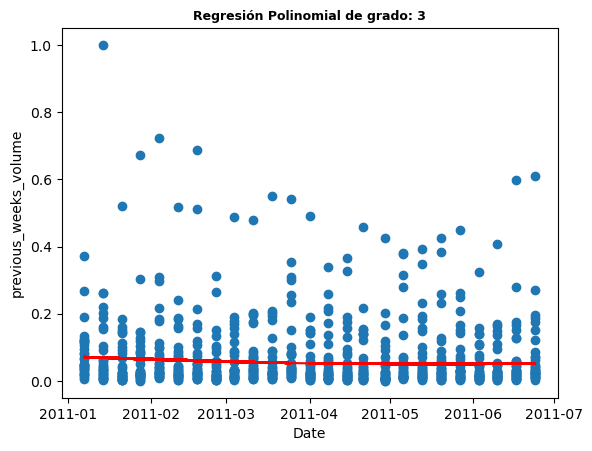

Métricas:
R^2: -0.028285922828539034
Root Mean Square Error(RMSE): 0.11065520286327199
Mean Square Error(MSE): 0.012244573920711876
Mean Absolute Error(MAE): 0.06352987165862628
Relative Squared Error(RSE): 1.028285922828539
Relative Absolute Error(RAE): 0.8928215659973765
Correlation coefficient(CC): 0.05791398684012219



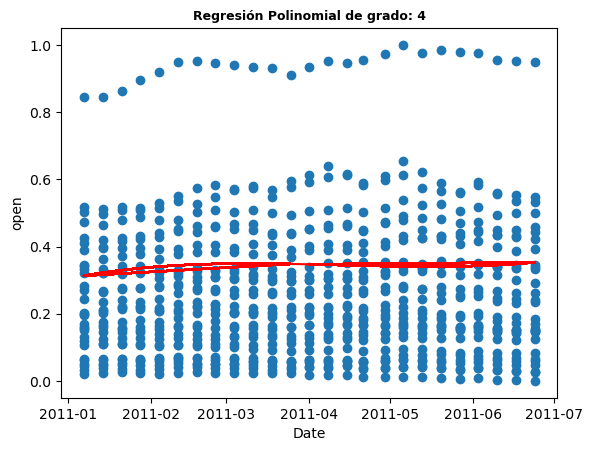

Métricas:
R^2: -0.13961888439485404
Root Mean Square Error(RMSE): 0.21557513318814117
Mean Square Error(MSE): 0.04647263804908481
Mean Absolute Error(MAE): 0.1779699195678075
Relative Squared Error(RSE): 1.139618884394854
Relative Absolute Error(RAE): 1.128112481897279
Correlation coefficient(CC): 0.017236214848083374



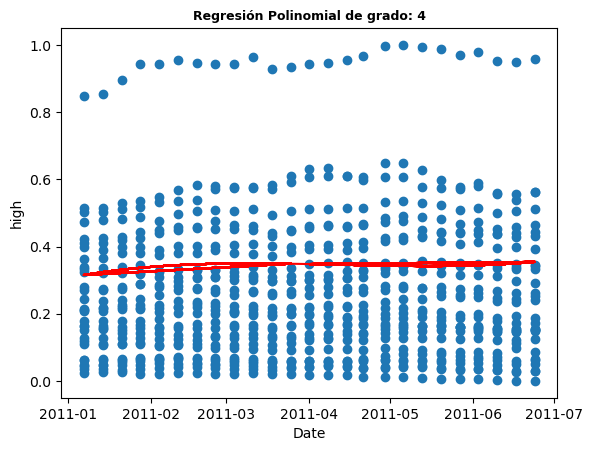

Métricas:
R^2: -0.13234529732992706
Root Mean Square Error(RMSE): 0.21723331206807792
Mean Square Error(MSE): 0.04719031187206693
Mean Absolute Error(MAE): 0.17910269095391762
Relative Squared Error(RSE): 1.132345297329927
Relative Absolute Error(RAE): 1.124583122854594
Correlation coefficient(CC): 0.016299883083504683



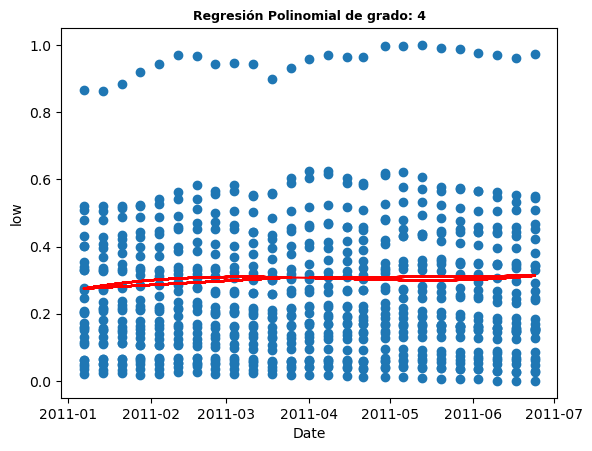

Métricas:
R^2: -0.02818244723184793
Root Mean Square Error(RMSE): 0.20675271848148677
Mean Square Error(MSE): 0.04274668659948492
Mean Absolute Error(MAE): 0.16595830743420079
Relative Squared Error(RSE): 1.028182447231848
Relative Absolute Error(RAE): 1.041784997697132
Correlation coefficient(CC): 0.011917455191923129



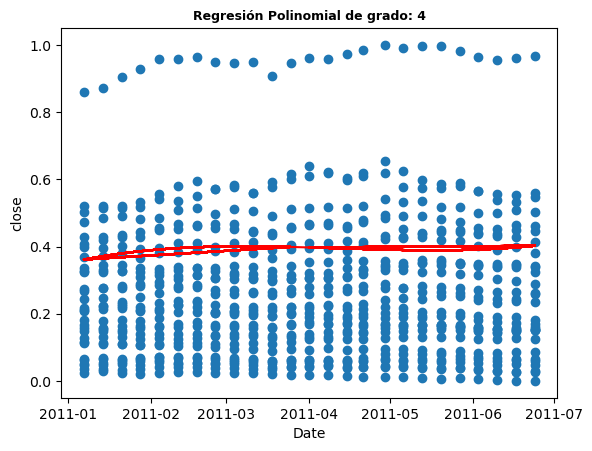

Métricas:
R^2: -0.3545589596529992
Root Mean Square Error(RMSE): 0.23826034572555668
Mean Square Error(MSE): 0.0567679923452618
Mean Absolute Error(MAE): 0.20148165422057907
Relative Squared Error(RSE): 1.3545589596529992
Relative Absolute Error(RAE): 1.2606588656255182
Correlation coefficient(CC): 0.012302027516933815



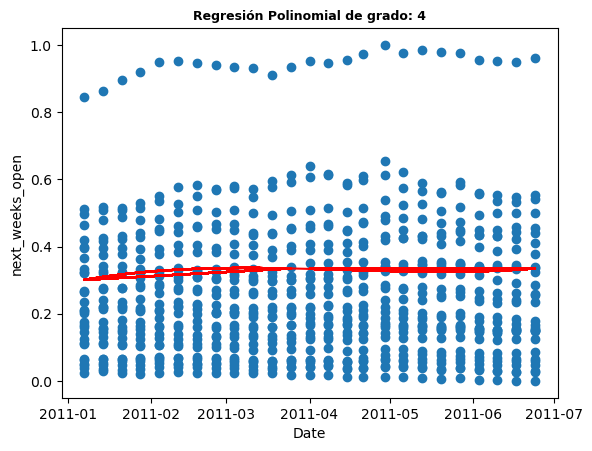

Métricas:
R^2: -0.08967324316269387
Root Mean Square Error(RMSE): 0.21160594017030473
Mean Square Error(MSE): 0.04477707391535859
Mean Absolute Error(MAE): 0.17299915871379606
Relative Squared Error(RSE): 1.0896732431626939
Relative Absolute Error(RAE): 1.092946864541829
Correlation coefficient(CC): 0.01470857729689291



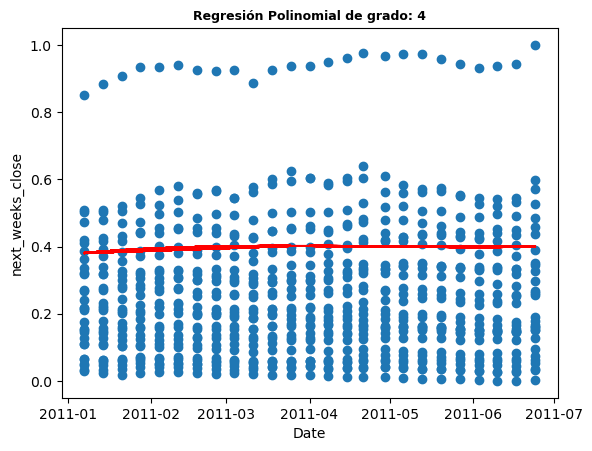

Métricas:
R^2: -0.43768992866984924
Root Mean Square Error(RMSE): 0.24120118675278265
Mean Square Error(MSE): 0.05817801249095074
Mean Absolute Error(MAE): 0.20510264158204244
Relative Squared Error(RSE): 1.4376899286698492
Relative Absolute Error(RAE): 1.3065812594873862
Correlation coefficient(CC): 0.02031424377789113



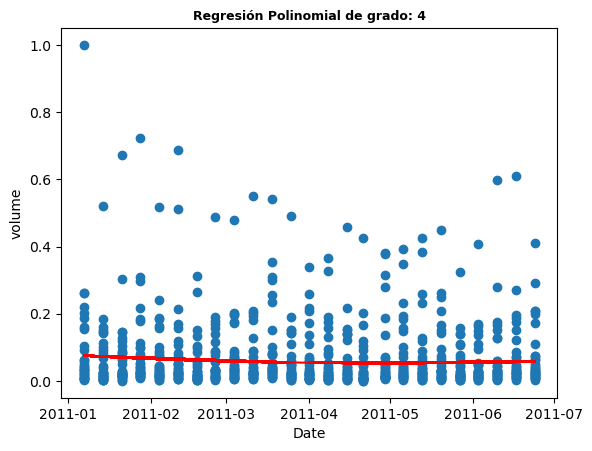

Métricas:
R^2: -0.018570636049304312
Root Mean Square Error(RMSE): 0.11068341251907433
Mean Square Error(MSE): 0.012250817806867582
Mean Absolute Error(MAE): 0.06506462416418073
Relative Squared Error(RSE): 1.0185706360493043
Relative Absolute Error(RAE): 0.9082167257450701
Correlation coefficient(CC): 0.05606866305935115



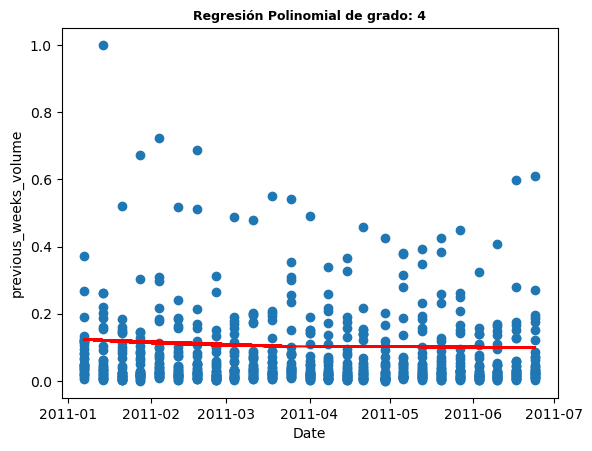

Métricas:
R^2: -0.07653807997403339
Root Mean Square Error(RMSE): 0.11322167923715905
Mean Square Error(MSE): 0.012819148649282132
Mean Absolute Error(MAE): 0.08654226328455625
Relative Squared Error(RSE): 1.0765380799740334
Relative Absolute Error(RAE): 1.21622784704907
Correlation coefficient(CC): 0.05621648910648084



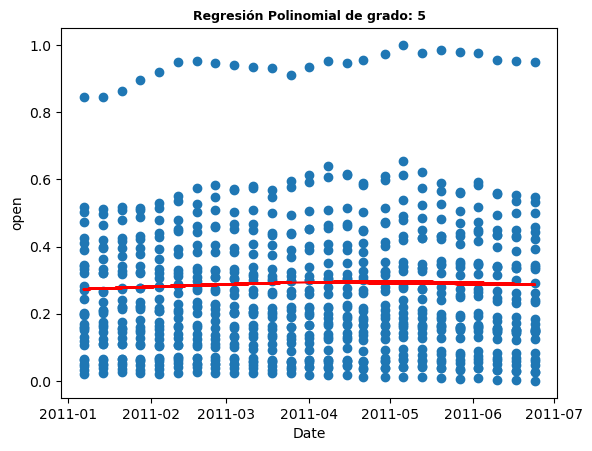

Métricas:
R^2: -0.010519012277060868
Root Mean Square Error(RMSE): 0.20299768673452231
Mean Square Error(MSE): 0.04120806081956726
Mean Absolute Error(MAE): 0.16164241623711925
Relative Squared Error(RSE): 1.0105190122770609
Relative Absolute Error(RAE): 1.0246160014229415
Correlation coefficient(CC): 0.0337215927158212



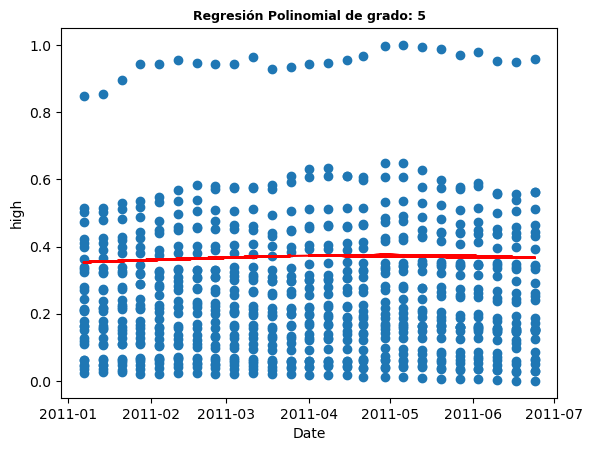

Métricas:
R^2: -0.2351664440168202
Root Mean Square Error(RMSE): 0.2268818347981895
Mean Square Error(MSE): 0.05147536696139295
Mean Absolute Error(MAE): 0.19031037320157762
Relative Squared Error(RSE): 1.2351664440168202
Relative Absolute Error(RAE): 1.194955992379364
Correlation coefficient(CC): 0.030990721689816588



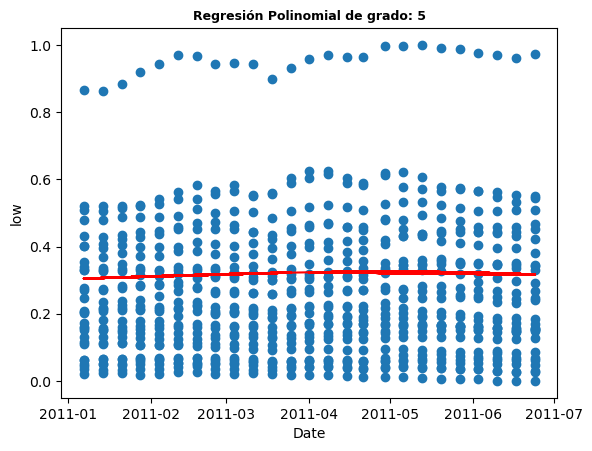

Métricas:
R^2: -0.06019162472141981
Root Mean Square Error(RMSE): 0.20994634599302495
Mean Square Error(MSE): 0.04407746819582294
Mean Absolute Error(MAE): 0.17036460148143873
Relative Squared Error(RSE): 1.0601916247214198
Relative Absolute Error(RAE): 1.0694450233073272
Correlation coefficient(CC): 0.029551289968980633



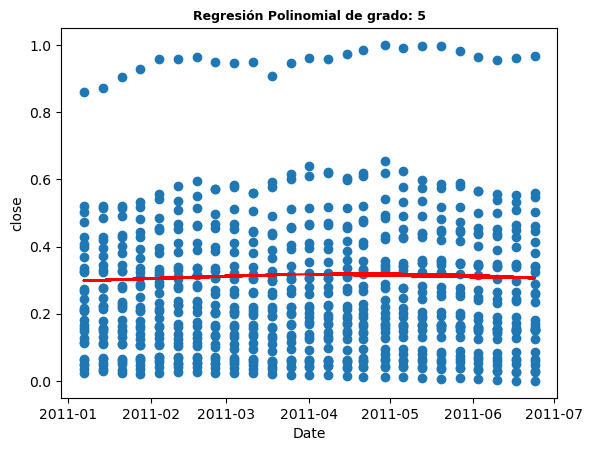

Métricas:
R^2: -0.041086382609544225
Root Mean Square Error(RMSE): 0.20887968023951559
Mean Square Error(MSE): 0.04363072081696227
Mean Absolute Error(MAE): 0.16851458365008215
Relative Squared Error(RSE): 1.0410863826095442
Relative Absolute Error(RAE): 1.0543858431551978
Correlation coefficient(CC): 0.030953054495787842



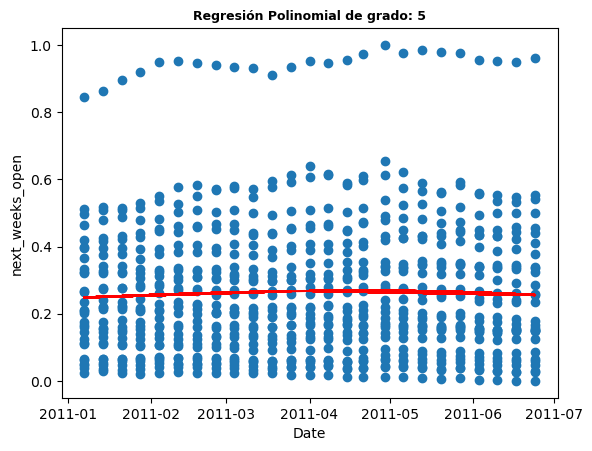

Métricas:
R^2: 0.0003306616352350966
Root Mean Square Error(RMSE): 0.20267860075702987
Mean Square Error(MSE): 0.04107861520482751
Mean Absolute Error(MAE): 0.15758329577390537
Relative Squared Error(RSE): 0.9996693383647649
Relative Absolute Error(RAE): 0.9955549512537768
Correlation coefficient(CC): 0.031065621064788666



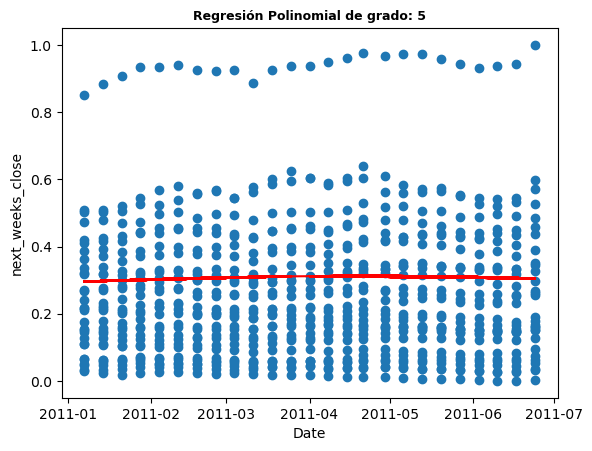

Métricas:
R^2: -0.04560926425806655
Root Mean Square Error(RMSE): 0.20569869494407633
Mean Square Error(MSE): 0.04231195310169618
Mean Absolute Error(MAE): 0.16608318294659394
Relative Squared Error(RSE): 1.0456092642580666
Relative Absolute Error(RAE): 1.058012576923504
Correlation coefficient(CC): 0.023893570758907245



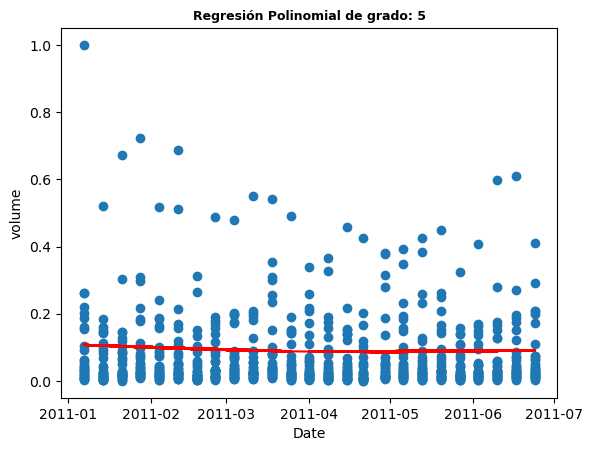

Métricas:
R^2: -0.0209521962102599
Root Mean Square Error(RMSE): 0.1108127335957661
Mean Square Error(MSE): 0.01227946192696623
Mean Absolute Error(MAE): 0.0797665011740739
Relative Squared Error(RSE): 1.02095219621026
Relative Absolute Error(RAE): 1.113435625750377
Correlation coefficient(CC): 0.056192600203904756



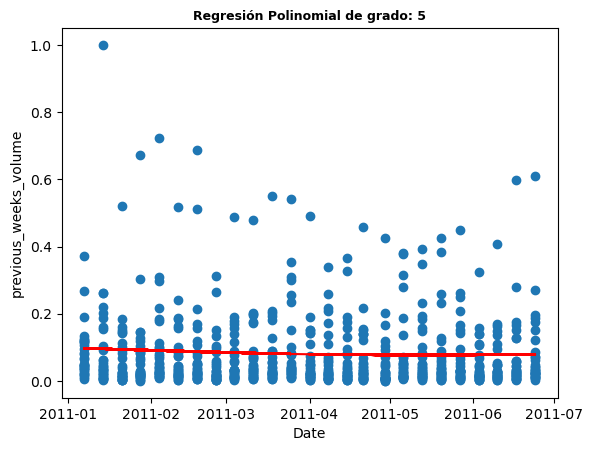

Métricas:
R^2: -0.0013759939061723792
Root Mean Square Error(RMSE): 0.10919769757832538
Mean Square Error(MSE): 0.011924137156407411
Mean Absolute Error(MAE): 0.0741967285286954
Relative Squared Error(RSE): 1.0013759939061724
Relative Absolute Error(RAE): 1.0427289970430338
Correlation coefficient(CC): 0.05817884425925967



In [181]:
grados = [2,3,4,5]
for grado in grados:
    for columna in DD_datos:
        y=np.asarray(DD_datos[columna],dtype=float)
        X=np.asarray(DD_datos.index.values,dtype=float)
        n = len(X)
        features = create_features(X, degree=grado, standardize=False)
        y = torch.tensor(y)
        y_true = torch.unsqueeze(y,1)
        weights = normal_equation(y_true, features)
        y_pred = predict(features, weights)
        x = pd.to_datetime(DD_datos.index, origin='1970-01-01', unit='D')
        plt.scatter(x,y)
        plt.plot(x, y_pred, c='red')
        plt.ylabel(columna)
        plt.xlabel('Date')
        plt.title(f'Regresión Polinomial de grado: {grado}',loc="center", fontdict ={'fontsize':9, 'fontweight':'bold','color':'black'})
        plt.show()

        y=np.asarray(DD_datos[columna],dtype=float)
        yy = np.asarray(y_pred)
        y_ = [item for lista in yy for item in lista]
        y_ = np.asarray(y_)
        metricas(y,y_)
        print('')

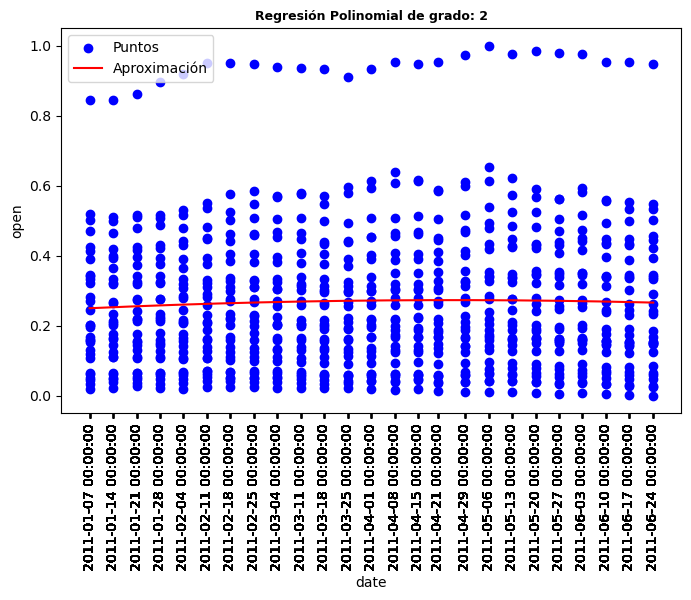

Métricas:
R^2: 0.0010732069673655698
Root Mean Square Error(RMSE): 0.20182997917754675
Mean Square Error(MSE): 0.04073534049480895
Mean Absolute Error(MAE): 0.15775932110457055
Relative Squared Error(RSE): 0.9989267930326344
Relative Absolute Error(RAE): 1.0000019087826757
Correlation coefficient(CC): 0.03275983783278252



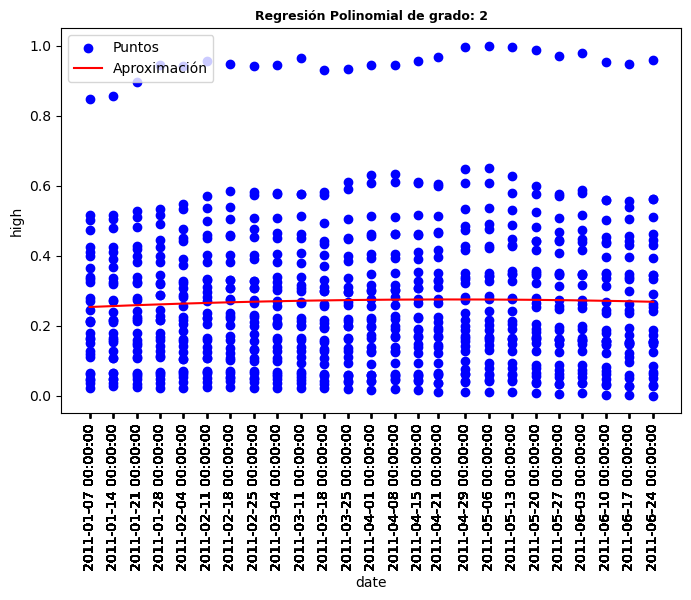

Métricas:
R^2: 0.0009069512673843816
Root Mean Square Error(RMSE): 0.20405157535500767
Mean Square Error(MSE): 0.04163704540486037
Mean Absolute Error(MAE): 0.15927049528840131
Relative Squared Error(RSE): 0.9990930487326156
Relative Absolute Error(RAE): 1.000057062325844
Correlation coefficient(CC): 0.030115632683975012



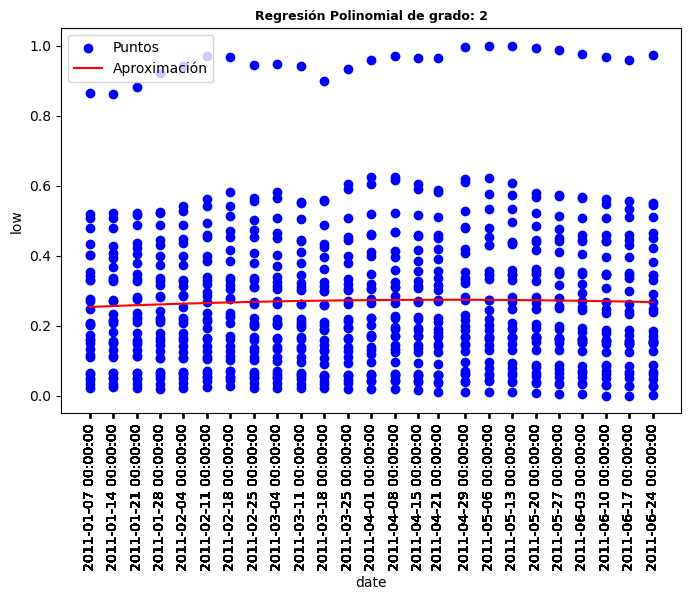

Métricas:
R^2: 0.0008121576810857789
Root Mean Square Error(RMSE): 0.2038166721885029
Mean Square Error(MSE): 0.04154123586199566
Mean Absolute Error(MAE): 0.15932129889669158
Relative Squared Error(RSE): 0.9991878423189142
Relative Absolute Error(RAE): 1.000121907545973
Correlation coefficient(CC): 0.028498380916473557



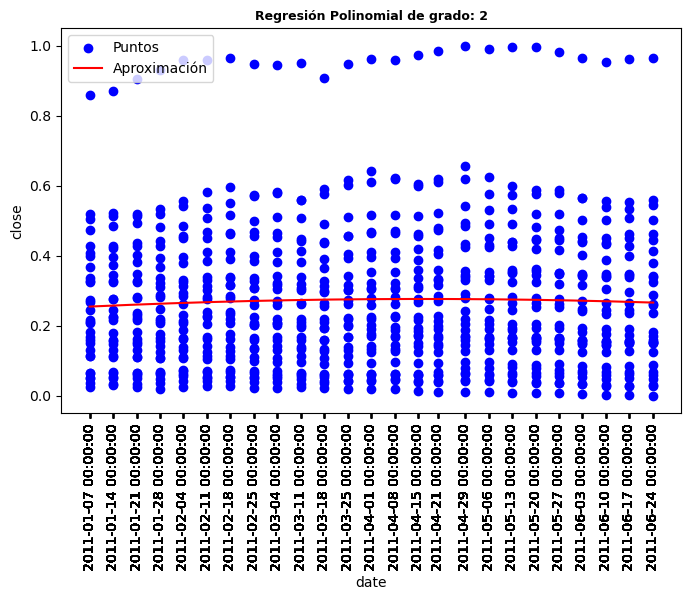

Métricas:
R^2: 0.0008792345695997072
Root Mean Square Error(RMSE): 0.20462646591871467
Mean Square Error(MSE): 0.04187199055438289
Mean Absolute Error(MAE): 0.15981233863162383
Relative Squared Error(RSE): 0.9991207654304003
Relative Absolute Error(RAE): 0.9999364076678624
Correlation coefficient(CC): 0.02965188981498635



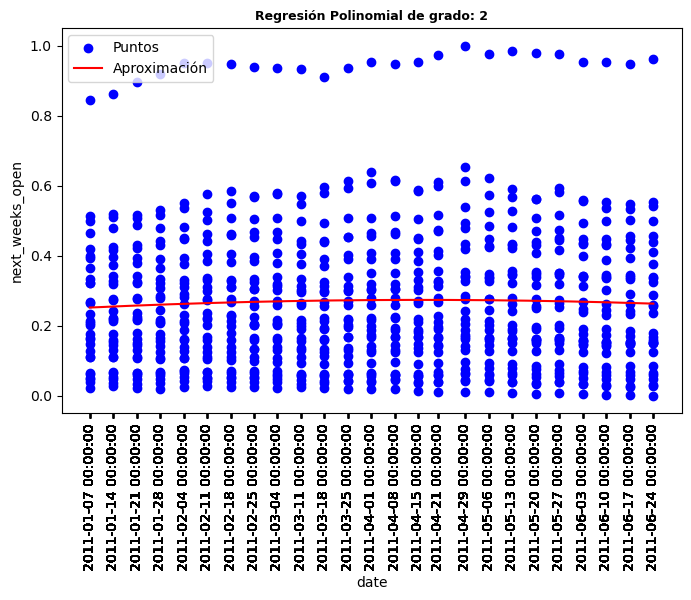

Métricas:
R^2: 0.000904976423190873
Root Mean Square Error(RMSE): 0.20262037248282416
Mean Square Error(MSE): 0.041055015345078404
Mean Absolute Error(MAE): 0.15827043406408725
Relative Squared Error(RSE): 0.9990950235768091
Relative Absolute Error(RAE): 0.9998960454263985
Correlation coefficient(CC): 0.030082827086316342



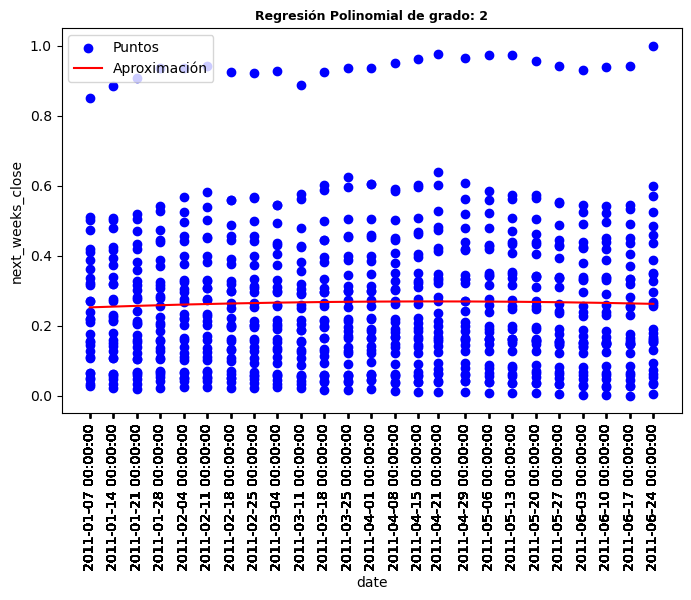

Métricas:
R^2: 0.0005628868847883384
Root Mean Square Error(RMSE): 0.20110578391125192
Mean Square Error(MSE): 0.04044353632255915
Mean Absolute Error(MAE): 0.1569935891294198
Relative Squared Error(RSE): 0.9994371131152117
Relative Absolute Error(RAE): 1.000108432704467
Correlation coefficient(CC): 0.023725240549620618



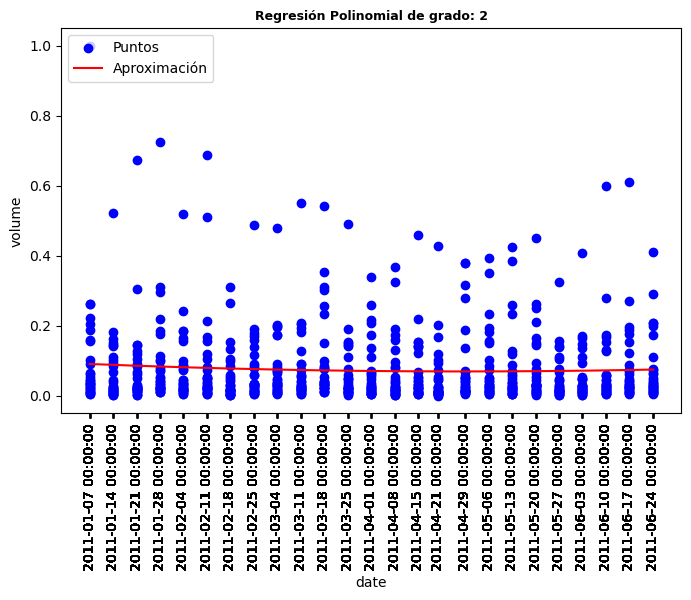

Métricas:
R^2: 0.0031566788785339917
Root Mean Square Error(RMSE): 0.10949654510930669
Mean Square Error(MSE): 0.011989493390874434
Mean Absolute Error(MAE): 0.07137992391414205
Relative Squared Error(RSE): 0.996843321121466
Relative Absolute Error(RAE): 0.9963700184857679
Correlation coefficient(CC): 0.05618432947573083



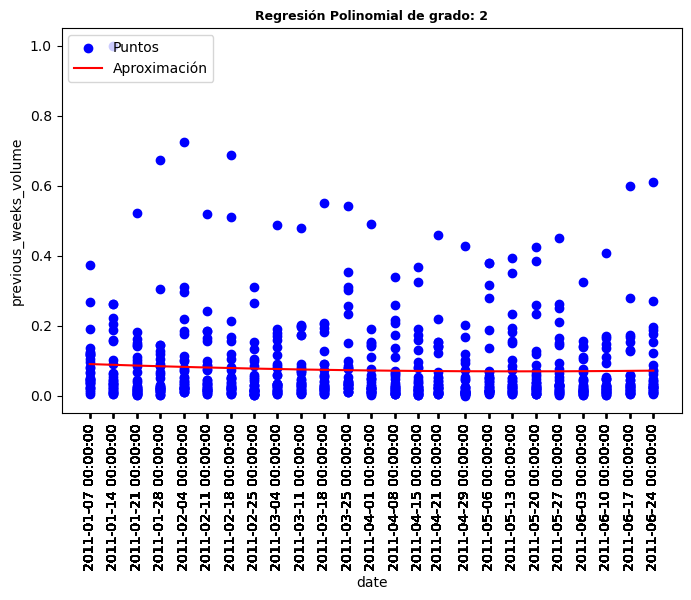

Métricas:
R^2: 0.0033740406713849147
Root Mean Square Error(RMSE): 0.10893839966649471
Mean Square Error(MSE): 0.011867574921896936
Mean Absolute Error(MAE): 0.07076100045171195
Relative Squared Error(RSE): 0.9966259593286151
Relative Absolute Error(RAE): 0.9944447483589425
Correlation coefficient(CC): 0.05808649325280934



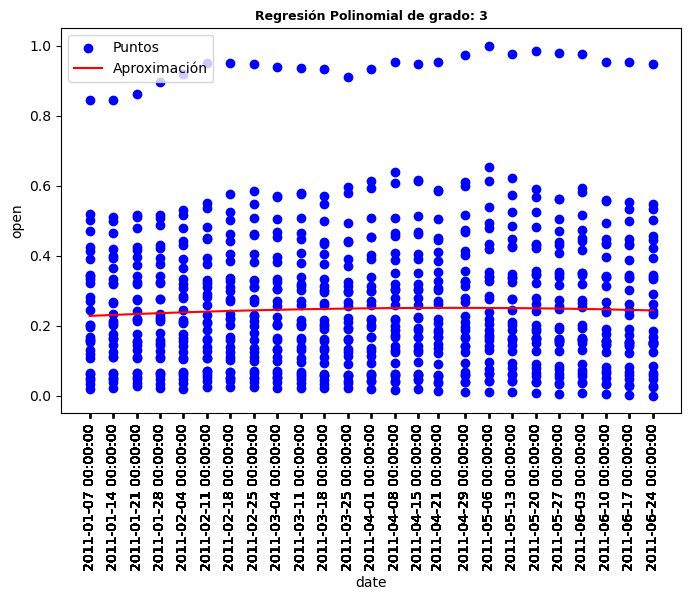

Métricas:
R^2: -0.010967008931728417
Root Mean Square Error(RMSE): 0.20304267955813934
Mean Square Error(MSE): 0.041226329722149256
Mean Absolute Error(MAE): 0.1554682935632037
Relative Squared Error(RSE): 1.0109670089317284
Relative Absolute Error(RAE): 0.9854795851671859
Correlation coefficient(CC): 0.03286020539253521



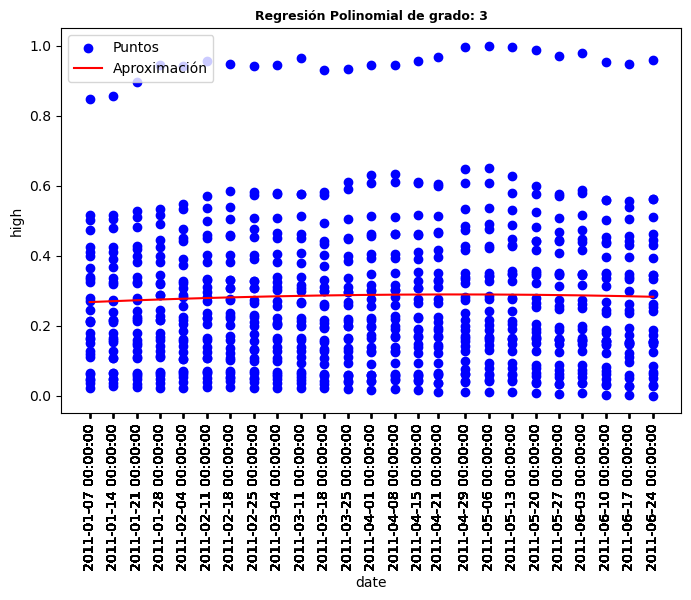

Métricas:
R^2: -0.003906472961942686
Root Mean Square Error(RMSE): 0.20454252394377964
Mean Square Error(MSE): 0.04183764410129166
Mean Absolute Error(MAE): 0.16168800708992398
Relative Squared Error(RSE): 1.0039064729619427
Relative Absolute Error(RAE): 1.0152365828389875
Correlation coefficient(CC): 0.03020578002632507



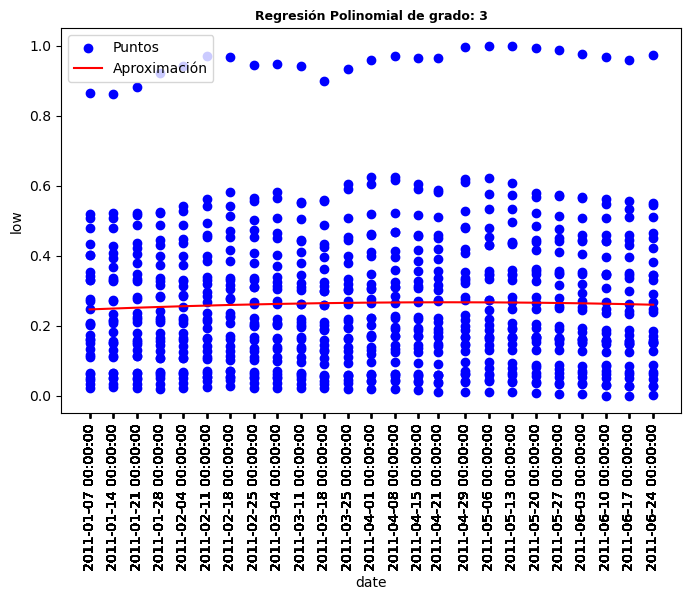

Métricas:
R^2: -0.000445456629751817
Root Mean Square Error(RMSE): 0.20394489740767513
Mean Square Error(MSE): 0.04159352117862713
Mean Absolute Error(MAE): 0.15836255333411883
Relative Squared Error(RSE): 1.0004454566297518
Relative Absolute Error(RAE): 0.9941034878649158
Correlation coefficient(CC): 0.02861696108674242



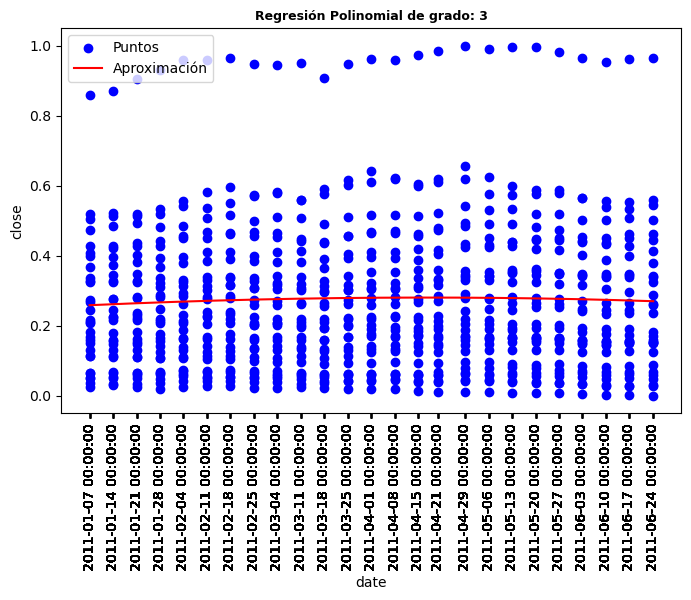

Métricas:
R^2: 0.0005161330904095429
Root Mean Square Error(RMSE): 0.20466364531969022
Mean Square Error(MSE): 0.04188720771554395
Mean Absolute Error(MAE): 0.16041537923607074
Relative Squared Error(RSE): 0.9994838669095905
Relative Absolute Error(RAE): 1.0037095972779493
Correlation coefficient(CC): 0.0297864011871426



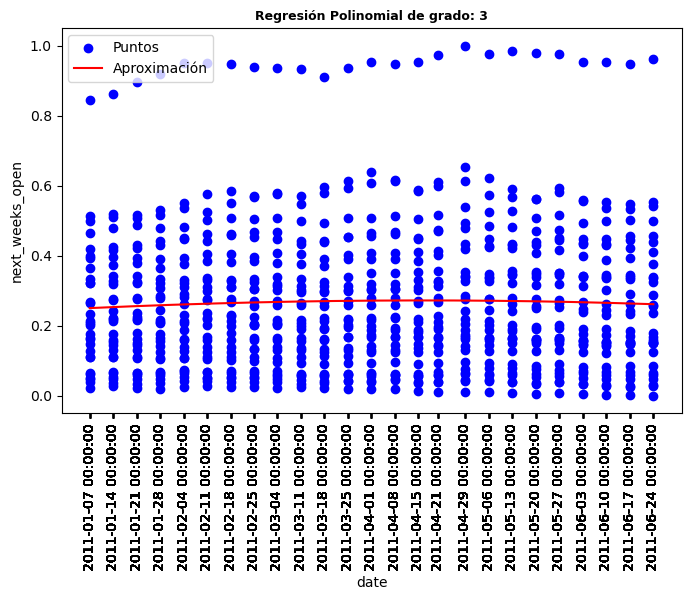

Métricas:
R^2: 0.0008509356577475202
Root Mean Square Error(RMSE): 0.2026258522478623
Mean Square Error(MSE): 0.04105723599917253
Mean Absolute Error(MAE): 0.15804785337942925
Relative Squared Error(RSE): 0.9991490643422525
Relative Absolute Error(RAE): 0.9984898601986021
Correlation coefficient(CC): 0.03018521569919765



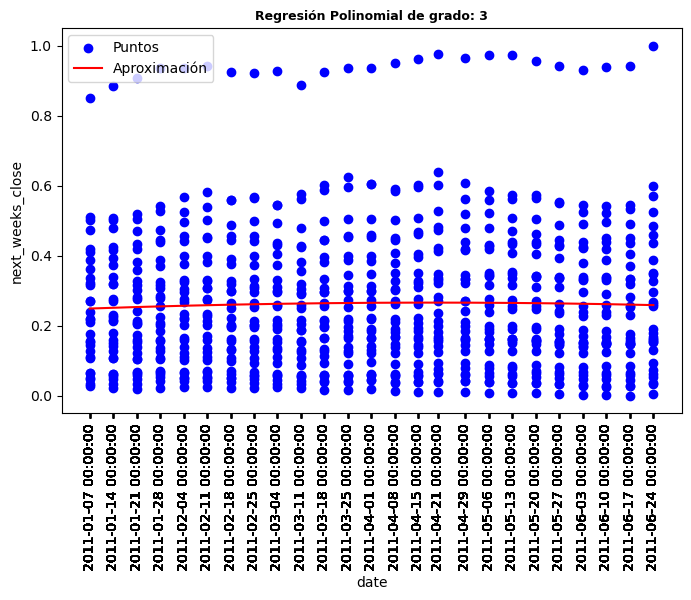

Métricas:
R^2: 0.0002751049077844847
Root Mean Square Error(RMSE): 0.20113473543494356
Mean Square Error(MSE): 0.040455181798484736
Mean Absolute Error(MAE): 0.1565261157776699
Relative Squared Error(RSE): 0.9997248950922155
Relative Absolute Error(RAE): 0.9971304509681284
Correlation coefficient(CC): 0.023743802900837878



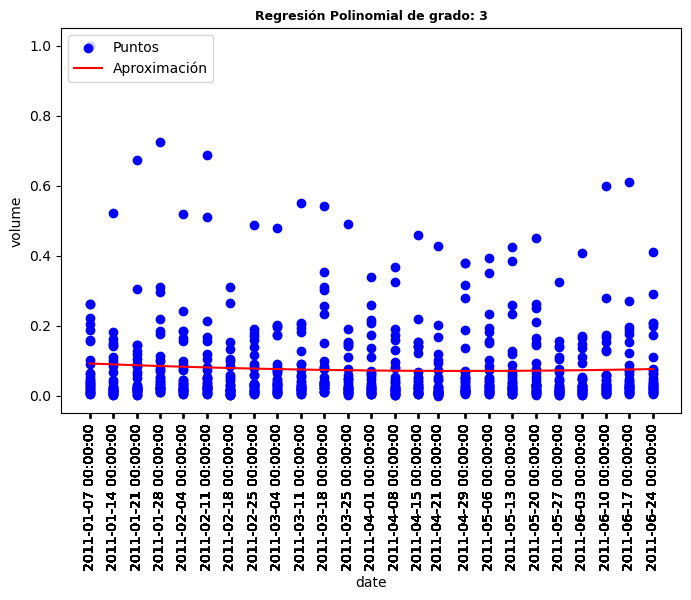

Métricas:
R^2: 0.002992447029747769
Root Mean Square Error(RMSE): 0.10950556462071977
Mean Square Error(MSE): 0.011991468682902632
Mean Absolute Error(MAE): 0.0720026383409239
Relative Squared Error(RSE): 0.9970075529702522
Relative Absolute Error(RAE): 1.0050622942812744
Correlation coefficient(CC): 0.05618507684088766



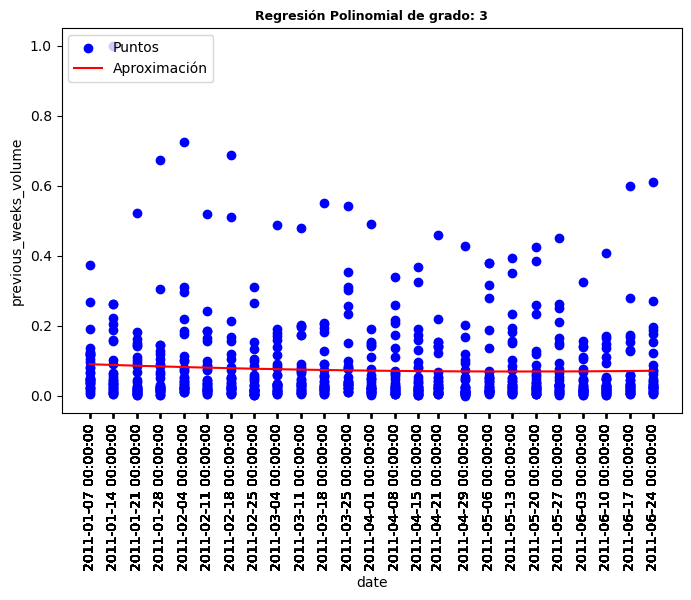

Métricas:
R^2: 0.003358896169832426
Root Mean Square Error(RMSE): 0.10893922736493064
Mean Square Error(MSE): 0.011867755258868054
Mean Absolute Error(MAE): 0.07057373325021907
Relative Squared Error(RSE): 0.9966411038301676
Relative Absolute Error(RAE): 0.9918129754349354
Correlation coefficient(CC): 0.058096076358161275



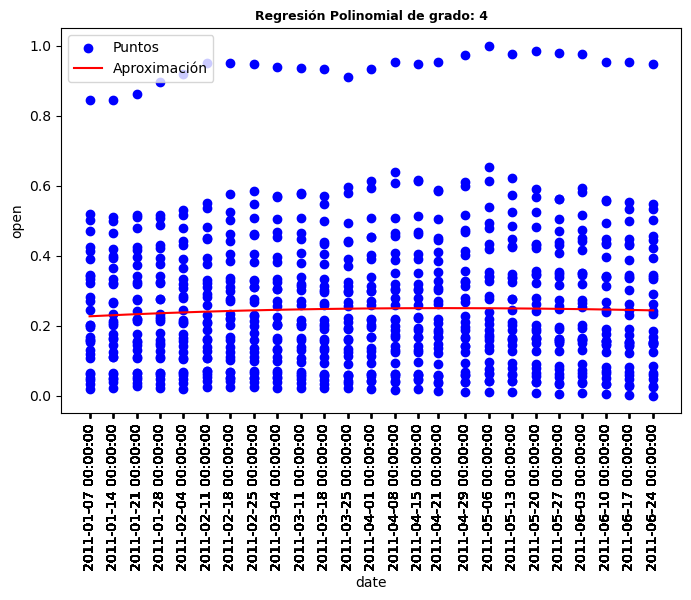

Métricas:
R^2: -0.011498066602522838
Root Mean Square Error(RMSE): 0.20309600138511374
Mean Square Error(MSE): 0.04124798577862212
Mean Absolute Error(MAE): 0.15543990190923634
Relative Squared Error(RSE): 1.0114980666025228
Relative Absolute Error(RAE): 0.9852996166685762
Correlation coefficient(CC): 0.03231194056926804



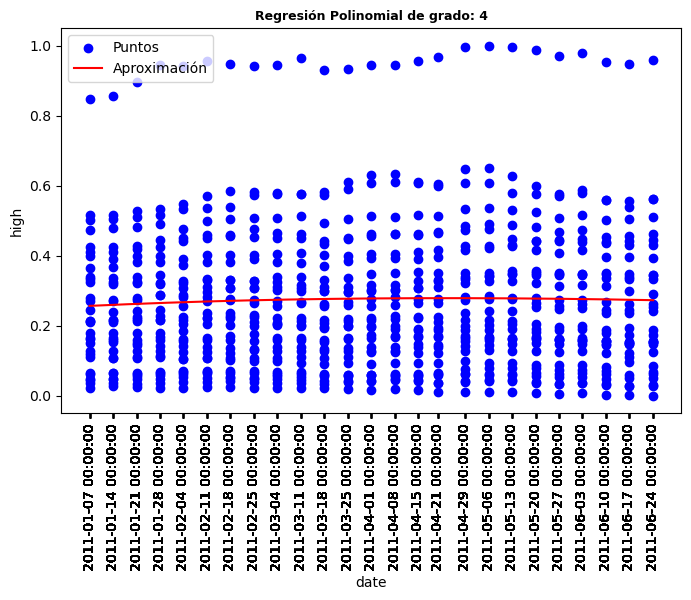

Métricas:
R^2: 0.0005179032202349276
Root Mean Square Error(RMSE): 0.20409130045382412
Mean Square Error(MSE): 0.041653258920933106
Mean Absolute Error(MAE): 0.15986088264576778
Relative Squared Error(RSE): 0.9994820967797651
Relative Absolute Error(RAE): 1.0037640957294451
Correlation coefficient(CC): 0.02969754994379322



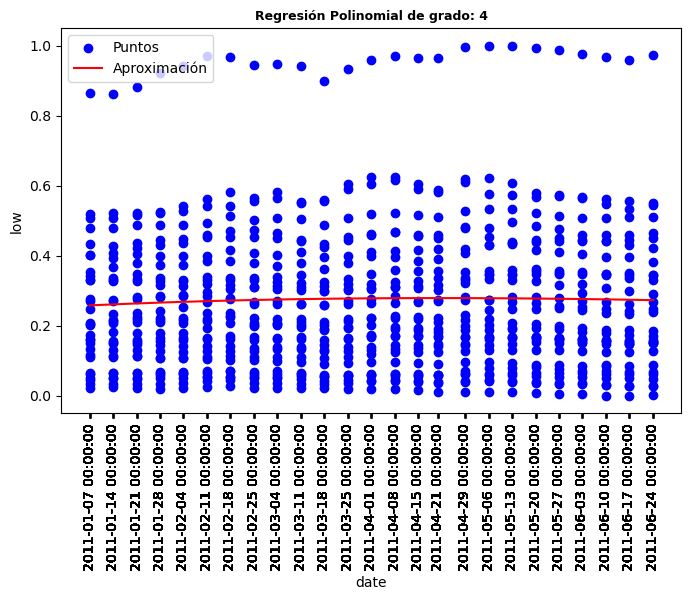

Métricas:
R^2: 0.00017240104105620269
Root Mean Square Error(RMSE): 0.20388191127500377
Mean Square Error(MSE): 0.04156783374514851
Mean Absolute Error(MAE): 0.1601409368975836
Relative Squared Error(RSE): 0.9998275989589438
Relative Absolute Error(RAE): 1.0052670948286904
Correlation coefficient(CC): 0.027974276702291568



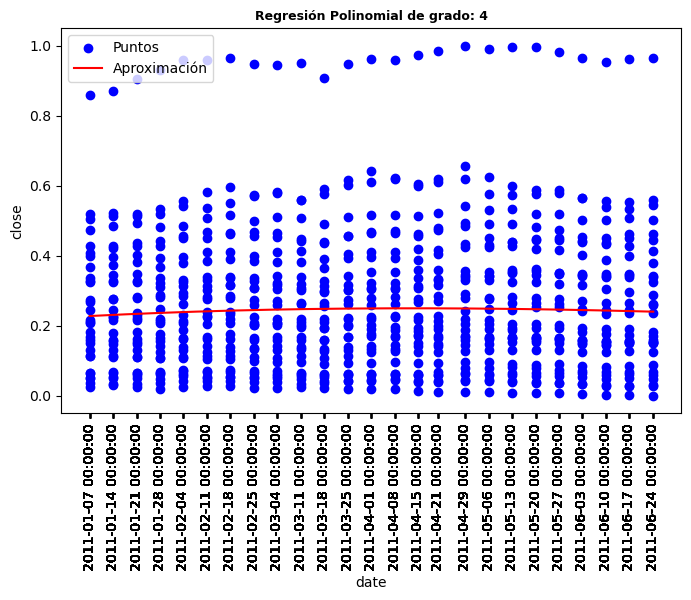

Métricas:
R^2: -0.015860059019149775
Root Mean Square Error(RMSE): 0.20633350407017215
Mean Square Error(MSE): 0.04257351490187575
Mean Absolute Error(MAE): 0.15725030997635256
Relative Squared Error(RSE): 1.0158600590191498
Relative Absolute Error(RAE): 0.9839059449900127
Correlation coefficient(CC): 0.029040751927992152



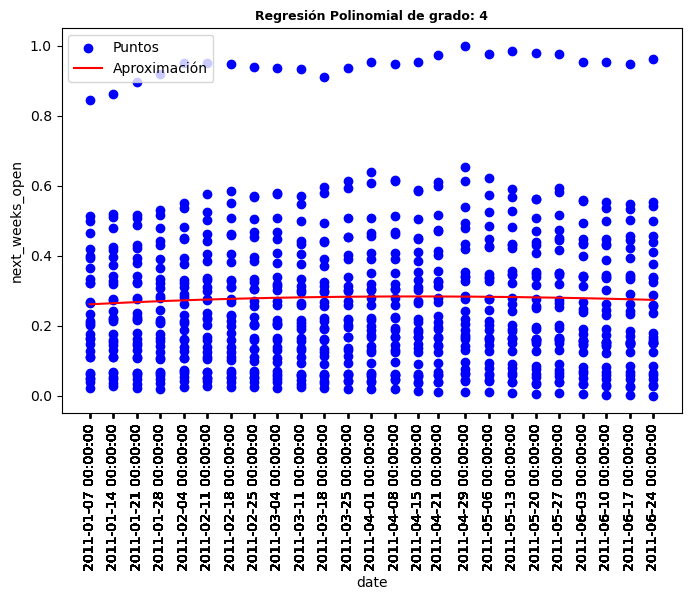

Métricas:
R^2: -0.0015669523409804764
Root Mean Square Error(RMSE): 0.20287087603500864
Mean Square Error(MSE): 0.04115659234321184
Mean Absolute Error(MAE): 0.15992928069430926
Relative Squared Error(RSE): 1.0015669523409805
Relative Absolute Error(RAE): 1.0103760456572457
Correlation coefficient(CC): 0.029631215135702636



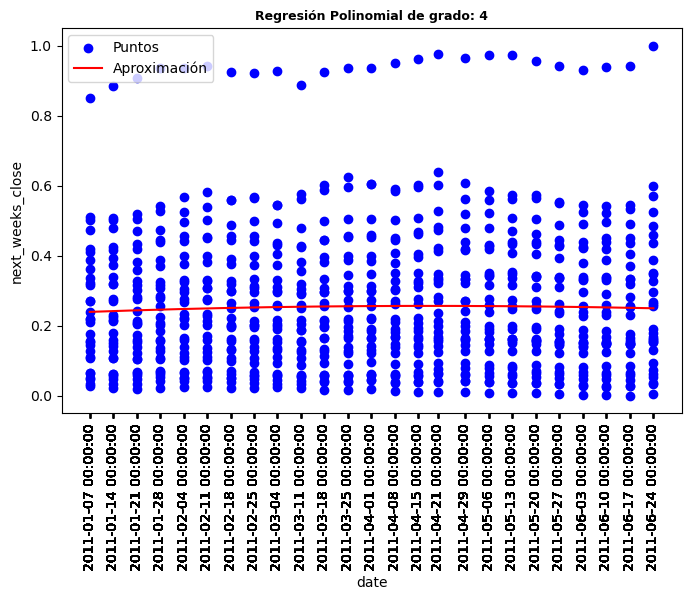

Métricas:
R^2: -0.003449580082818038
Root Mean Square Error(RMSE): 0.20150907193451367
Mean Square Error(MSE): 0.040605906071909004
Mean Absolute Error(MAE): 0.1554619137903705
Relative Squared Error(RSE): 1.003449580082818
Relative Absolute Error(RAE): 0.990351082539768
Correlation coefficient(CC): 0.023649339547700352



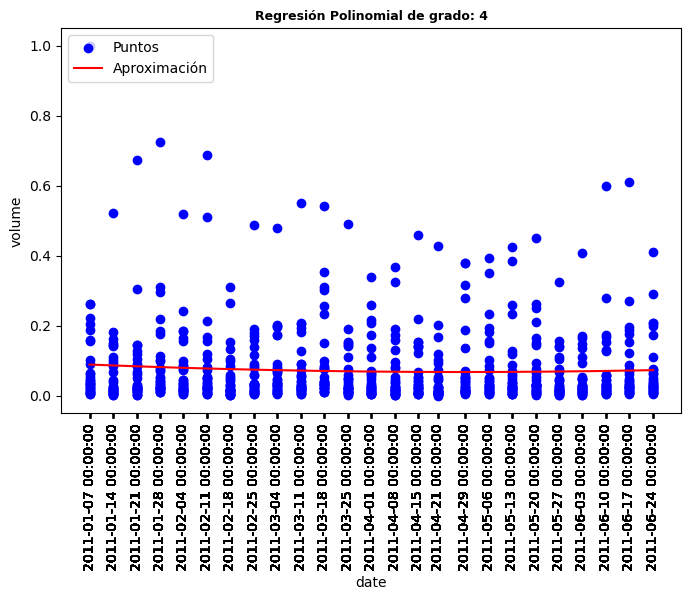

Métricas:
R^2: 0.0029326778376080886
Root Mean Square Error(RMSE): 0.10950884692335813
Mean Square Error(MSE): 0.011992187554483483
Mean Absolute Error(MAE): 0.07066934235733463
Relative Squared Error(RSE): 0.9970673221623919
Relative Absolute Error(RAE): 0.9864512329215878
Correlation coefficient(CC): 0.056183039427369345



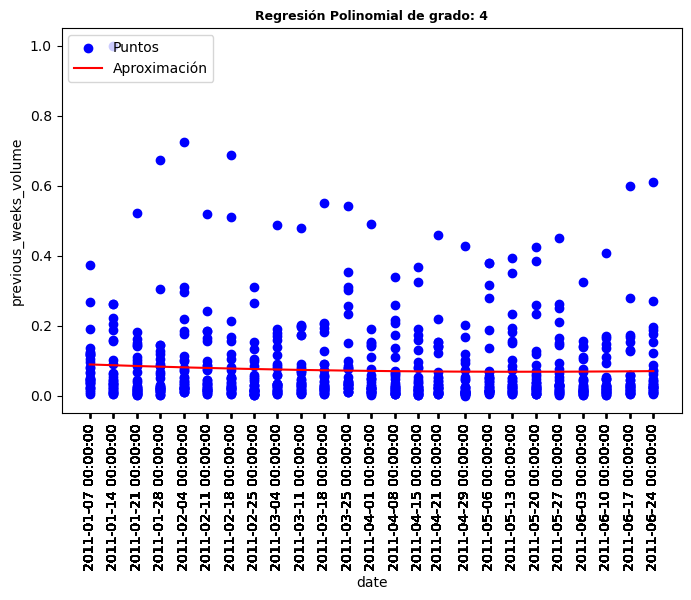

Métricas:
R^2: 0.0032445475196559714
Root Mean Square Error(RMSE): 0.10894547670396604
Mean Square Error(MSE): 0.011869116894254406
Mean Absolute Error(MAE): 0.07024380167342517
Relative Squared Error(RSE): 0.996755452480344
Relative Absolute Error(RAE): 0.9871762585744329
Correlation coefficient(CC): 0.05804960745838564



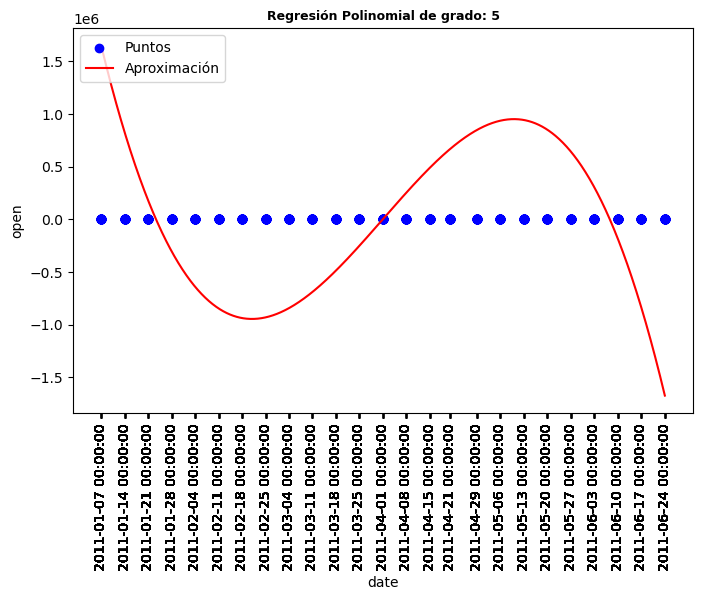

Métricas:
R^2: -4.907287032947459e+26
Root Mean Square Error(RMSE): 4473418969437.979
Mean Square Error(MSE): 2.001147727612755e+25
Mean Absolute Error(MAE): 4472661847068.255
Relative Squared Error(RSE): 4.907287032947459e+26
Relative Absolute Error(RAE): 28351227382900.574
Correlation coefficient(CC): 0.025801544514600556



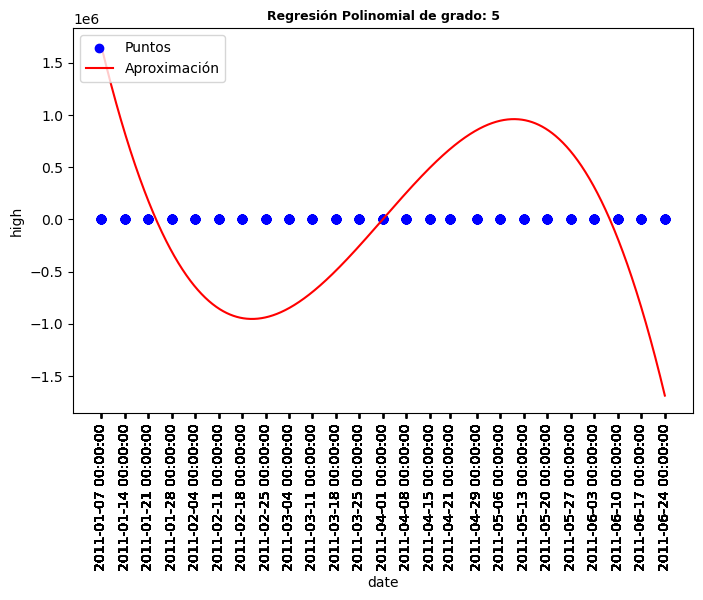

Métricas:
R^2: -4.885879943725393e+26
Root Mean Square Error(RMSE): 4512408192017.877
Mean Square Error(MSE): 2.0361827691390043e+25
Mean Absolute Error(MAE): 4511644470755.271
Relative Squared Error(RSE): 4.885879943725393e+26
Relative Absolute Error(RAE): 28328548282041.543
Correlation coefficient(CC): 0.02183449100011853



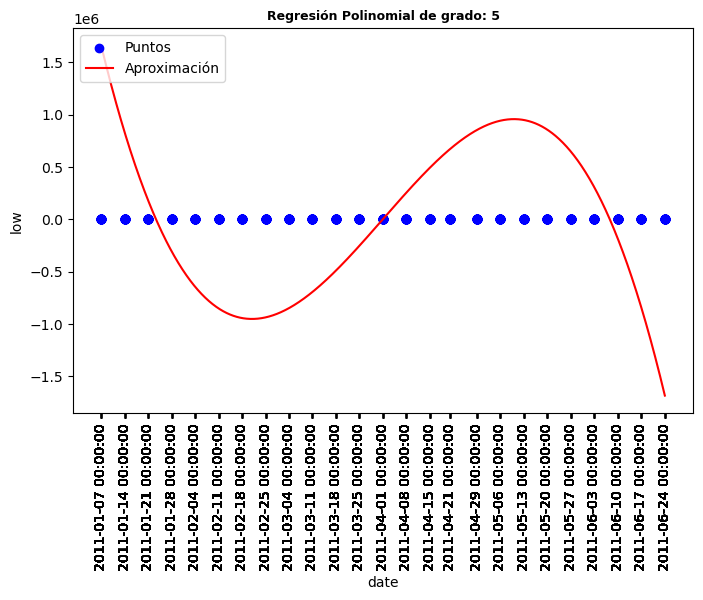

Métricas:
R^2: -4.874932770406256e+26
Root Mean Square Error(RMSE): 4501947760225.657
Mean Square Error(MSE): 2.026753363580081e+25
Mean Absolute Error(MAE): 4501185809382.268
Relative Squared Error(RSE): 4.874932770406256e+26
Relative Absolute Error(RAE): 28255698196493.574
Correlation coefficient(CC): 0.019377683148070205



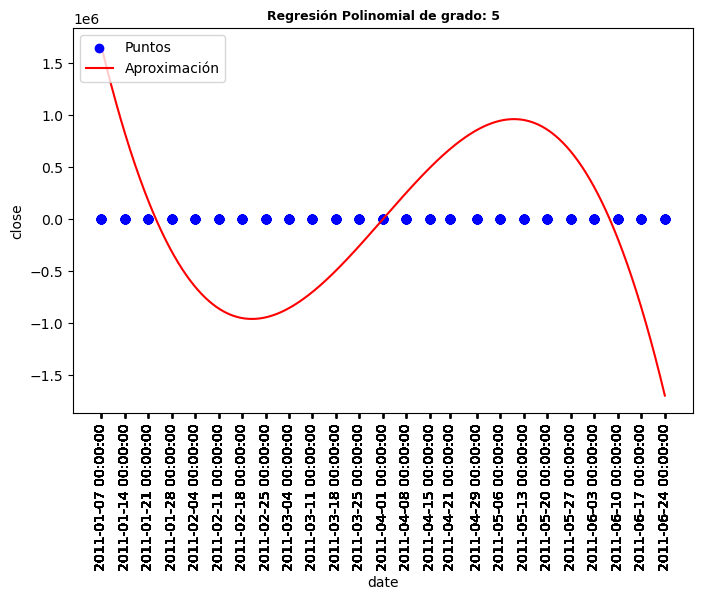

Métricas:
R^2: -4.8943517896935084e+26
Root Mean Square Error(RMSE): 4528979990143.522
Mean Square Error(MSE): 2.0511659751120417e+25
Mean Absolute Error(MAE): 4528213464118.127
Relative Squared Error(RSE): 4.8943517896935084e+26
Relative Absolute Error(RAE): 28332765437471.27
Correlation coefficient(CC): 0.014715787796420897



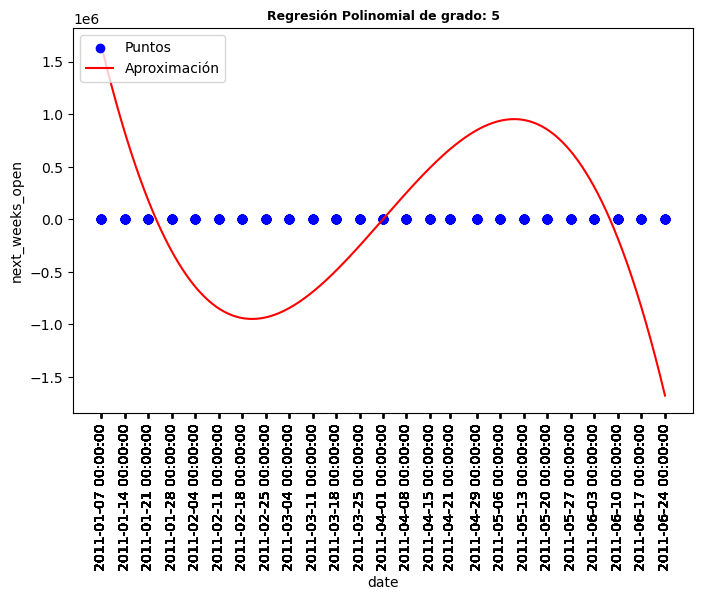

Métricas:
R^2: -4.8914635870212525e+26
Root Mean Square Error(RMSE): 4483313660715.473
Mean Square Error(MSE): 2.010010138035797e+25
Mean Absolute Error(MAE): 4482554863677.636
Relative Squared Error(RSE): 4.8914635870212525e+26
Relative Absolute Error(RAE): 28319179814615.496
Correlation coefficient(CC): 0.01472923844180385



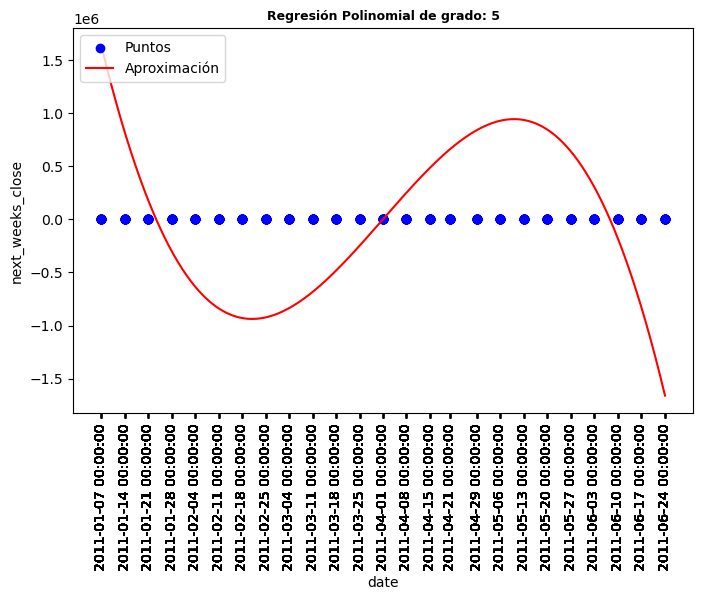

Métricas:
R^2: -4.862270170526424e+26
Root Mean Square Error(RMSE): 4435742923518.985
Mean Square Error(MSE): 1.967581528354876e+25
Mean Absolute Error(MAE): 4434992177788.106
Relative Squared Error(RSE): 4.862270170526424e+26
Relative Absolute Error(RAE): 28252574519637.207
Correlation coefficient(CC): 0.010826547244461145



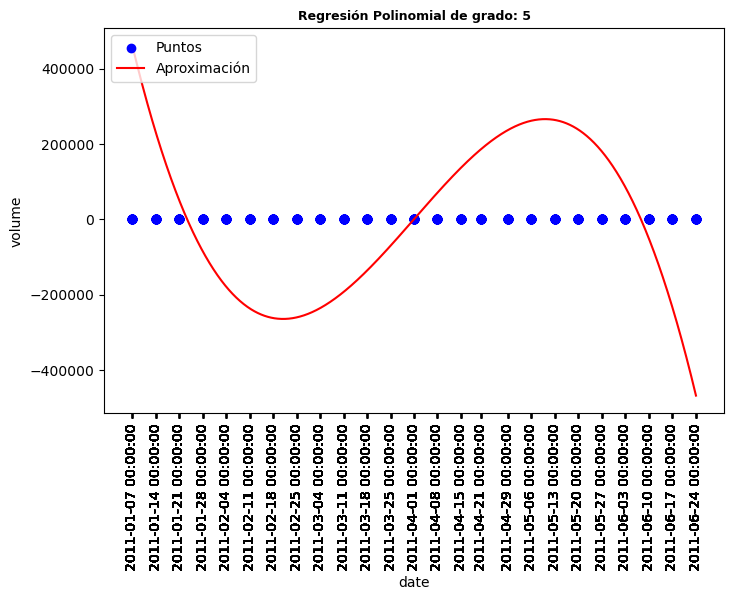

Métricas:
R^2: -1.3024801741014841e+26
Root Mean Square Error(RMSE): 1251620089404.7258
Mean Square Error(MSE): 1.566552848201494e+24
Mean Absolute Error(MAE): 1251408253765.239
Relative Squared Error(RSE): 1.3024801741014841e+26
Relative Absolute Error(RAE): 17468016167081.953
Correlation coefficient(CC): -0.033825288888510455



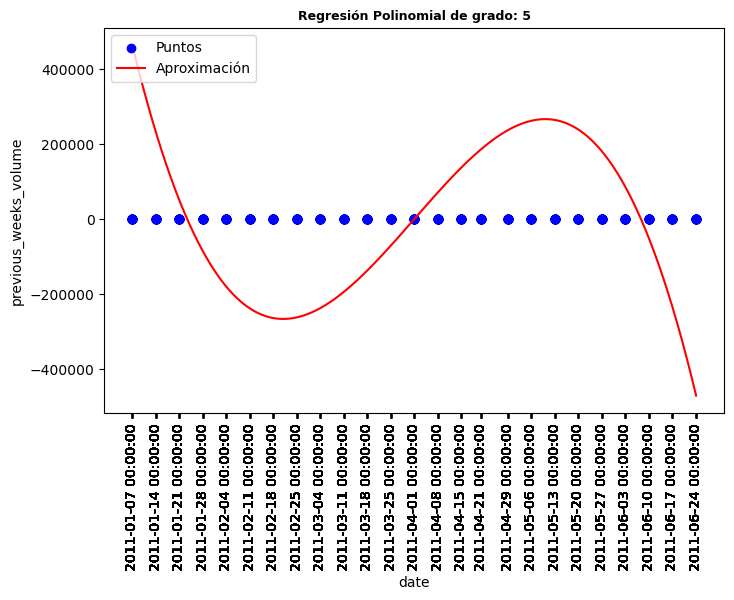

Métricas:
R^2: -1.3246546199657576e+26
Root Mean Square Error(RMSE): 1255932279814.3079
Mean Square Error(MSE): 1.5773658914795648e+24
Mean Absolute Error(MAE): 1255719714340.248
Relative Squared Error(RSE): 1.3246546199657576e+26
Relative Absolute Error(RAE): 17647346241078.195
Correlation coefficient(CC): -0.048143580270636095



In [184]:
grados = [2,3,4,5]
for grado in grados:
    for columna in DD_datos:    
        y=np.asarray(DD_datos[columna])
        x=np.asarray(DD_datos.index.values)
        n = len(x)
        nsumax = [n,sum(x)]
        d = []
        sa = 0
        for i in range(2,grado*2+1):
            sa = 0
            for j in range(len(x)):
                sa +=math.pow(x[j],i)
            nsumax.append(sa) 

        for i in range(grado+1):
            sa =  sum(np.power(x,i)*y)
            d.append(sa)

        A = np.zeros([grado+1,grado+1])
        contador = 0
        for i in range(grado+1):
            A[contador,:] = nsumax[contador:(contador+(grado+1))]
            contador += 1
        b = np.dot(np.linalg.inv(A),d)
        x_aprox = np.arange(x[0],x[n-1]+0.1,0.1)
        y_aprox = 0
        y_aproxR = 0  
        for i in range(grado+1):
            y_aprox = y_aprox + b[i]*np.power(x_aprox,i)
            y_aproxR = y_aproxR + b[i] * np.power(x,i)
 
        fig,ax = plt.subplots(figsize=(8,5))
        ax.scatter(x,y,color='black',marker="o")
        ax.plot(x_aprox, y_aprox,color='red')
        ax.set_title(f'Regresión Polinomial de grado: {grado}',loc="center")
        ax.set_xlabel("date")
        ax.set_ylabel(columna)
        plt.xticks(x,DD_datos_1['date'],rotation=90)
        plt.show()    
    
        metricas(y,y_aproxR)
        print('')